## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score,confusion_matrix,classification_report
from sklearn.decomposition import PCA,IncrementalPCA
from sklearn.model_selection import GridSearchCV,StratifiedKFold
from sklearn.pipeline import Pipeline

## PART-1

## Loading Car data into dataframe

In [130]:
car_attributes=pd.read_json("Part1 - Car-Attributes.json")
print("The car_attributes dataframe shape is",car_attributes.shape)
car_names=pd.read_csv("Part1 - Car name.csv")
print("The car_names dataframe shape is",car_names.shape)

The car_attributes dataframe shape is (398, 8)
The car_names dataframe shape is (398, 1)


The car_attributes dataframe contains 398 observations and 8 columns.
The car_names dataframe contains 398 observations and 1 column.we will merget this two dataframe into one in the next step

## Merging Two dataframes and export it as single file

In [131]:
car_data=pd.concat([car_attributes,car_names],axis=1)
print("The final shape of car_data is",car_data.shape)
car_data.to_csv('Car_data.csv') # Storing it as csv file
car_data.to_json('Car_data.json') # Storing it as json file 
car_data.to_excel('Car_data.xlsx',index=False) # Storing it as Excel file
car_data.head()

The final shape of car_data is (398, 9)


mpg  cyl   disp   hp    wt   acc  yr  origin                   car_name
0  18.0    8  307.0  130  3504  12.0  70       1  chevrolet chevelle malibu
1  15.0    8  350.0  165  3693  11.5  70       1          buick skylark 320
2  18.0    8  318.0  150  3436  11.0  70       1         plymouth satellite
3  16.0    8  304.0  150  3433  12.0  70       1              amc rebel sst
4  17.0    8  302.0  140  3449  10.5  70       1                ford torino

## Data Cleansing

### Checking Null Values

In [132]:
car_data.isnull().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

The cardata does not contains any null Values.We will check if there is any invalid values

### Checking Invalid Values

In [133]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


From this info,we can see that hp is infered as object.So there is a possibility of invalid character in hp attribute

In [134]:
car_data[car_data['hp']=='?']

mpg  cyl   disp hp    wt   acc  yr  origin              car_name
32   25.0    4   98.0  ?  2046  19.0  71       1            ford pinto
126  21.0    6  200.0  ?  2875  17.0  74       1         ford maverick
330  40.9    4   85.0  ?  1835  17.3  80       2  renault lecar deluxe
336  23.6    4  140.0  ?  2905  14.3  80       1    ford mustang cobra
354  34.5    4  100.0  ?  2320  15.8  81       2           renault 18i
374  23.0    4  151.0  ?  3035  20.5  82       1        amc concord dl

From this we can see that Hp attribute contains '?' Values.We could fix this in the next step

In [135]:
car_data['hp']=car_data['hp'].replace('?',np.nan) #Replacing the '?' with nan value
car_data['hp']=car_data['hp'].fillna(car_data['hp'].median()) #Imputing Missing Value with Median
car_data['hp']=car_data['hp'].astype('float') # Converting the type to float
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


### Dropping Irrelevant Columns

In [136]:
car_data['car_name'].value_counts()
car_data.drop('car_name',axis=1,inplace=True)
car_data.head(10)

mpg  cyl   disp     hp    wt   acc  yr  origin
0  18.0    8  307.0  130.0  3504  12.0  70       1
1  15.0    8  350.0  165.0  3693  11.5  70       1
2  18.0    8  318.0  150.0  3436  11.0  70       1
3  16.0    8  304.0  150.0  3433  12.0  70       1
4  17.0    8  302.0  140.0  3449  10.5  70       1
5  15.0    8  429.0  198.0  4341  10.0  70       1
6  14.0    8  454.0  220.0  4354   9.0  70       1
7  14.0    8  440.0  215.0  4312   8.5  70       1
8  14.0    8  455.0  225.0  4425  10.0  70       1
9  15.0    8  390.0  190.0  3850   8.5  70       1

Since the car_name is more unique,we can drop this column

### Corrections on data

In [137]:
car_data['age']=83-car_data['yr']
car_data=pd.get_dummies(car_data,columns=['origin'])
car_data.drop(['yr'],axis=1,inplace=True)
car_data.head(10)

mpg  cyl   disp     hp    wt   acc  age  origin_1  origin_2  origin_3
0  18.0    8  307.0  130.0  3504  12.0   13         1         0         0
1  15.0    8  350.0  165.0  3693  11.5   13         1         0         0
2  18.0    8  318.0  150.0  3436  11.0   13         1         0         0
3  16.0    8  304.0  150.0  3433  12.0   13         1         0         0
4  17.0    8  302.0  140.0  3449  10.5   13         1         0         0
5  15.0    8  429.0  198.0  4341  10.0   13         1         0         0
6  14.0    8  454.0  220.0  4354   9.0   13         1         0         0
7  14.0    8  440.0  215.0  4312   8.5   13         1         0         0
8  14.0    8  455.0  225.0  4425  10.0   13         1         0         0
9  15.0    8  390.0  190.0  3850   8.5   13         1         0         0

This dataset was used in 1983.So we can subtract year from 83 to find age of the vechicle which will be useful in prediction.
Also we are converting origin into dummy variables(one hot encoding).

## Data Analysis & Visualization

In [10]:
car_data.describe()

mpg         cyl        disp          hp           wt  \
count  398.000000  398.000000  398.000000  398.000000   398.000000   
mean    23.514573    5.454774  193.425879  104.304020  2970.424623   
std      7.815984    1.701004  104.269838   38.222625   846.841774   
min      9.000000    3.000000   68.000000   46.000000  1613.000000   
25%     17.500000    4.000000  104.250000   76.000000  2223.750000   
50%     23.000000    4.000000  148.500000   93.500000  2803.500000   
75%     29.000000    8.000000  262.000000  125.000000  3608.000000   
max     46.600000    8.000000  455.000000  230.000000  5140.000000   

              acc         age    origin_1    origin_2    origin_3  
count  398.000000  398.000000  398.000000  398.000000  398.000000  
mean    15.568090    6.989950    0.625628    0.175879    0.198492  
std      2.757689    3.697627    0.484569    0.381197    0.399367  
min      8.000000    1.000000    0.000000    0.000000    0.000000  
25%     13.825000    4.000000    0.000000    0.000000    0.000000  
50%     15.500000    7.000000    1.000000    0.000000    0.000000  
75%     17.175000   10.000000    1.000000    0.000000    0.000000  
max     24.800000   13.000000    1.000000    1.000000    1.000000

In [11]:
car_data.skew(numeric_only=True)

mpg         0.457066
cyl         0.526922
disp        0.719645
hp          1.106224
wt          0.531063
acc         0.278777
age        -0.011535
origin_1   -0.521133
origin_2    1.709131
origin_3    1.517553
dtype: float64

From this the skewness values for hp,origin_2 and origin_3 are heavily skewed

In [12]:
car_data.kurtosis(numeric_only=True)

mpg        -0.510781
cyl        -1.376662
disp       -0.746597
hp          0.763583
wt         -0.785529
acc         0.419497
age        -1.181232
origin_1   -1.737175
origin_2    0.925756
origin_3    0.304473
dtype: float64

From this the Kurtosis values for the attributes is high in cylinder,age and origin.

### Univariate Analysis

In [13]:
def plots(feature):
    fig = plt.figure(constrained_layout = True, figsize=(10,3))
    gs = gridspec.GridSpec(nrows=1, ncols=4, figure=fig)

    ax1 = fig.add_subplot(gs[0,:3])    
    sns.distplot(car_data[feature]);
    ax2 = fig.add_subplot(gs[0,3])    
    sns.boxplot(car_data[feature]);

Here we are defined function for drawing distplot & boxplot to visualize each attribute distribution

#### MPG(Miles per Gallon)

Skewness : 0.45706634399491913
Kurtosis : -0.5107812652123154
Median : 23.0


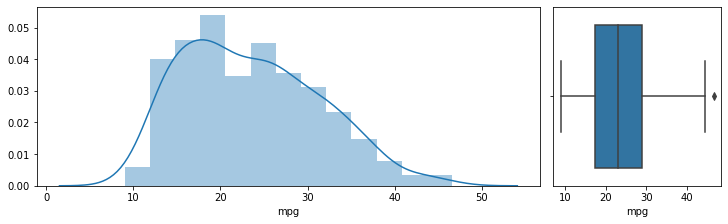

In [14]:
print("Skewness :",car_data['mpg'].skew())
print("Kurtosis :",car_data['mpg'].kurtosis())
print("Median :", car_data['mpg'].median())
plots('mpg');

This column contains only one outlier.It is acceptable.
Here the Central Value is around 23,Kurtosis Value & Skewness value is small and it is acceptable

#### Cyl(No of Cylinders)

Skewness : 0.5269215453528939
Kurtosis : -1.376662176054571
Median : 4.0


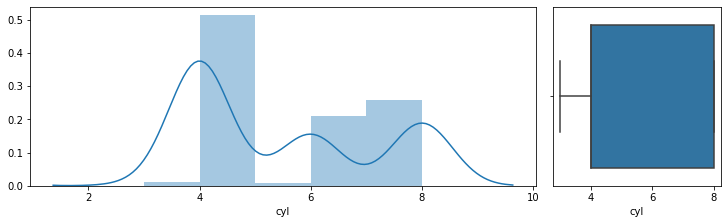

In [15]:
print("Skewness :",car_data['cyl'].skew())
print("Kurtosis :",car_data['cyl'].kurtosis())
print("Median :", car_data['cyl'].median())
plots('cyl');

From this the Central value for Cylinder is 4 and the maximum value is 8.There is no outliers in this column

#### disp(Displacement)

Skewness : 0.7196451643005952
Kurtosis : -0.7465966295967594
Median : 148.5


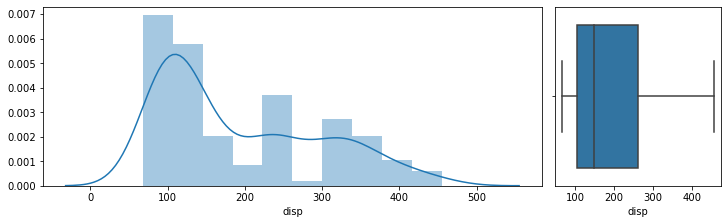

In [16]:
print("Skewness :",car_data['disp'].skew())
print("Kurtosis :",car_data['disp'].kurtosis())
print("Median :", car_data['disp'].median())
plots('disp');

Here this column contains no Outliers.The Central Value is around 149 and the skewness,Kurtosis value are small

#### hp(Horse Power)

Skewness : 1.1062242930872614
Kurtosis : 0.7635832666961107
Median : 93.5


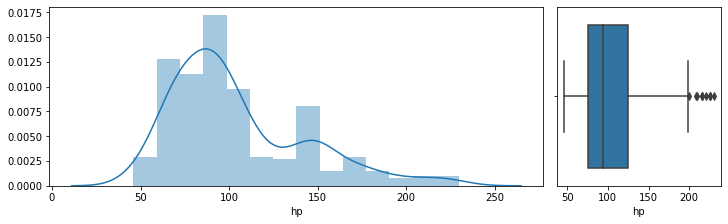

In [17]:
print("Skewness :",car_data['hp'].skew())
print("Kurtosis :",car_data['hp'].kurtosis())
print("Median :", car_data['hp'].median())
plots('hp');

This Column contains high number of outliers.We need to fix this by applying transformation.

Here the Central value is around 94 and the skewness value is greater than 1 which means the column is right skewed

#### Outliers Treatment

95th Quantile Value: 180.0
Skewness : 0.8259693608819882
Kurtosis : -0.24139074790481496


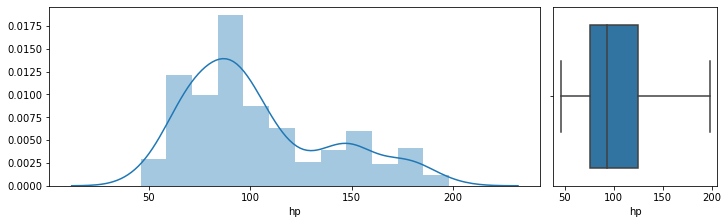

In [18]:
Q1 = car_data['hp'].quantile(0.25)
Q3 = car_data['hp'].quantile(0.75)
q95th = car_data['hp'].quantile(0.95)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR
car_data['hp'] = np.where(car_data['hp'] > UW, q95th, car_data['hp'])
plots('hp')
print("95th Quantile Value:",q95th)
print("Skewness :",car_data['hp'].skew())
print("Kurtosis :",car_data['hp'].kurtosis())

From the Outlier Treatment ,we have removed the outliers and reduced the skewness value

#### acc(Accleration)

Skewness : 0.27877684462588986
Kurtosis : 0.4194968829706842
Median : 15.5


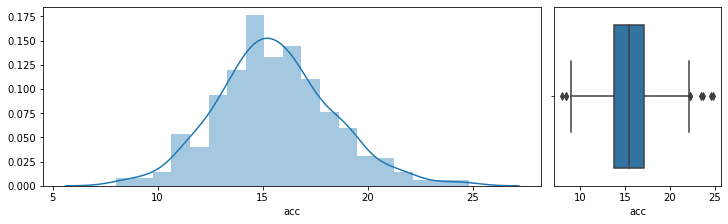

In [19]:
print("Skewness :",car_data['acc'].skew())
print("Kurtosis :",car_data['acc'].kurtosis())
print("Median :", car_data['acc'].median())
plots('acc');

This Column contains high number of outliers at the tail and few outliers at the head.We need to fix this by applying transformation.

Here the Central value is around 16 and the skewness ,kurtosis values are small

#### Outliers Treatment

95th Quantile Value: 20.414999999999996
Skewness : 0.13721378083647398
Kurtosis : -0.32464830108826837


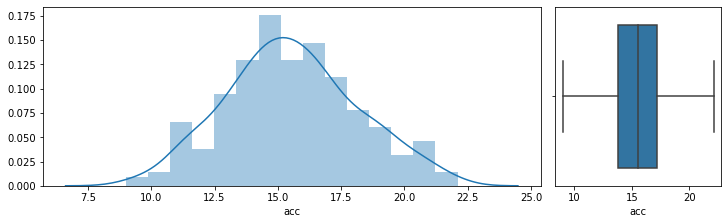

In [20]:
Q1 = car_data['acc'].quantile(0.25)
Q3 = car_data['acc'].quantile(0.75)
q95th = car_data['acc'].quantile(0.95)
q5th=car_data['acc'].quantile(0.05)
IQR = Q3 - Q1
UW = Q3 + 1.5*IQR
LW =Q1-1.5*IQR
car_data['acc'] = np.where(car_data['acc'] > UW, q95th, car_data['acc'])
car_data['acc'] = np.where(car_data['acc'] < LW, q5th, car_data['acc'])
plots('acc')
print("95th Quantile Value:",q95th)
print("Skewness :",car_data['acc'].skew())
print("Kurtosis :",car_data['acc'].kurtosis())

From the Outlier Treatment ,we have removed the outliers at the tail and the head

#### age (Age of the Vehicle at 1983)

Skewness : -0.01153459401509825
Kurtosis : -1.1812317432191857
Median : 7.0


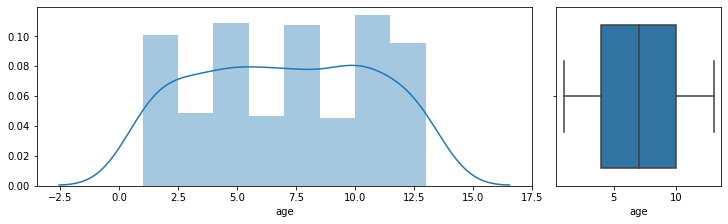

In [21]:
print("Skewness :",car_data['age'].skew())
print("Kurtosis :",car_data['age'].kurtosis())
print("Median :", car_data['age'].median())
plots('age');

This column contains no outliers.The Kurtosis value is less than -1 which indicates the distribution is too flat.

In [22]:
car_attributes['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

From this it is clear that origin 1 Vehicles are high in  number when compared to other two origins.

### Bivariate Analysis

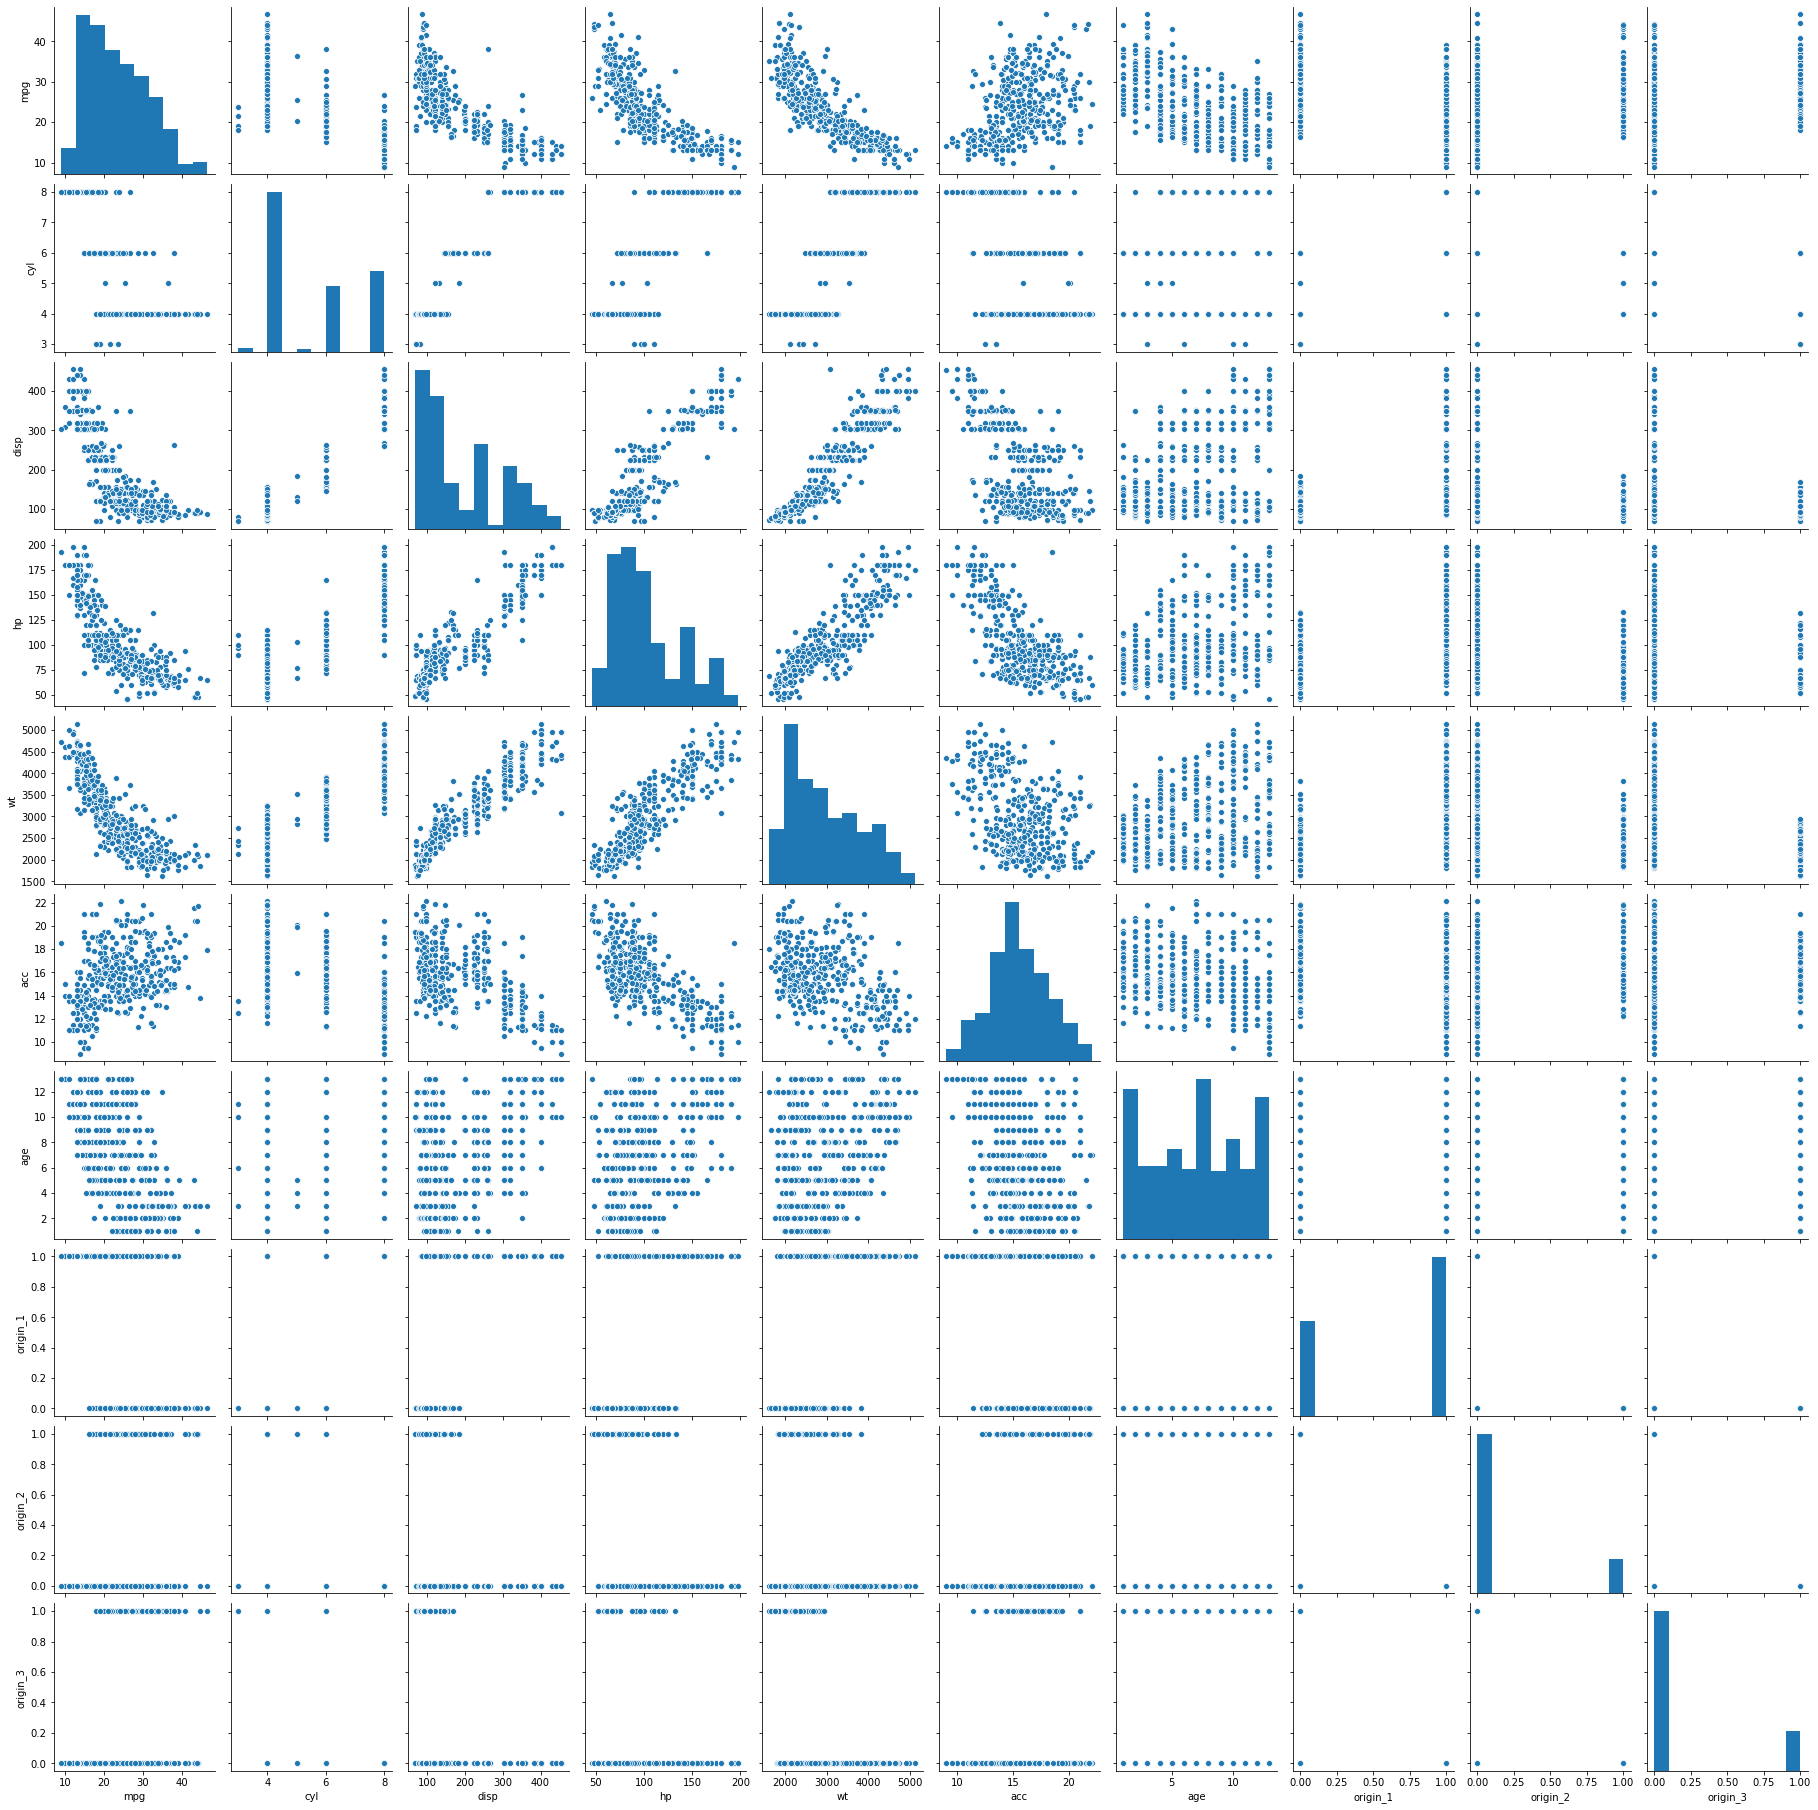

In [23]:
sns.pairplot(car_data);

From this we can see that Mpg is having linear correlations with displacement,weight & hp.Also there are some high correlation between
the attributes which violates the assumption of linear regression(Multicollinearity).We can prove this by checking the correlation plot

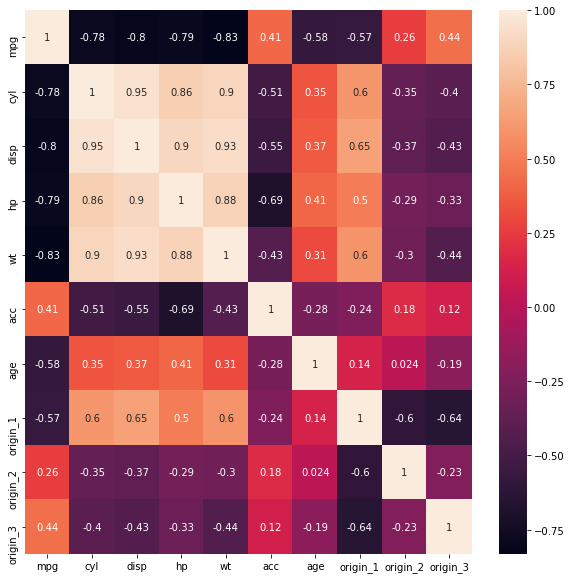

In [24]:
plt.figure(figsize=(10,10));
sns.heatmap(car_data.corr(),annot=True);

From this heatmap,it is clear that displacement is having high correlation between hp and weight.And Cylinder is also having high correlation
between displacement,hp and weight.It will violate assumption of the linear regression.

## Clustering

### K-Means Clustering

In [25]:
car_data_scaled = pd.DataFrame(StandardScaler().fit_transform(car_data), columns = car_data.columns)# Scaling the Variables
car_data_scaled.head()

mpg       cyl      disp        hp        wt       acc       age  \
0 -0.706439  1.498191  1.090604  0.752478  0.630870 -1.367237  1.627426   
1 -1.090751  1.498191  1.503514  1.738094  0.854333 -1.560141  1.627426   
2 -0.706439  1.498191  1.196232  1.315687  0.550470 -1.753045  1.627426   
3 -0.962647  1.498191  1.061796  1.315687  0.546923 -1.367237  1.627426   
4 -0.834543  1.498191  1.042591  1.034083  0.565841 -1.945949  1.627426   

   origin_1  origin_2  origin_3  
0  0.773559 -0.461968 -0.497643  
1  0.773559 -0.461968 -0.497643  
2  0.773559 -0.461968 -0.497643  
3  0.773559 -0.461968 -0.497643  
4  0.773559 -0.461968 -0.497643

In [26]:
cluster_range = range(1,15)
cluster_sse = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init=5)
    clusters.fit(car_data_scaled)
    cluster_sse.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_sse})
clusters_df[0:15]

num_clusters  cluster_errors
0              1     3980.000000
1              2     2218.925324
2              3     1640.263759
3              4     1136.488863
4              5      935.484554
5              6      858.427272
6              7      779.605369
7              8      707.121209
8              9      656.034249
9             10      607.521752
10            11      578.304370
11            12      530.970371
12            13      508.045058
13            14      482.738776

Here we are finding the Sum of squared Errors for each Cluster with different seeds.

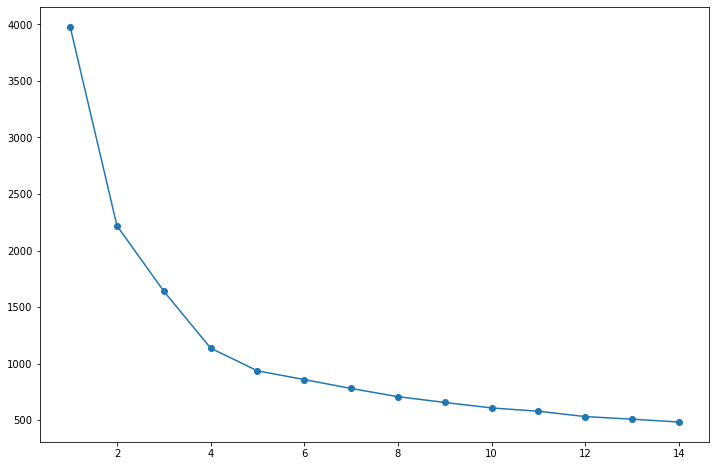

In [27]:
plt.figure(figsize=(12,8))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" );

From the above Elbow plot,we can see that there is bend at 4.So we can create 4 Clusters.

In [28]:
kmeans_model=KMeans(4, n_init = 5,random_state=4)# Defining Kmeans Cluster with 4 Clusters
kmeans_model.fit(car_data_scaled) # Fitting the Scaled data to Kmeans Model
kmeans_predict=kmeans_model.predict(car_data_scaled) # We are Predicting the Lables of the Cluster
centroids = kmeans_model.cluster_centers_ # We are finding the Centroids
silhouette_score(car_data_scaled,kmeans_predict) # We are finding the silhouette_score

0.4459677101966816

Here the Silhouette_score is 0.44 which is good.So the optimal number of Clusters is 4

### Hierarchical Clustering

In [29]:
method_list=['single','complete','average','weighted','centroid','ward']
copt_list=[]
for i in method_list:
    Z = linkage(car_data_scaled, metric='euclidean', method=i)
    c, coph_dists = cophenet(Z , pdist(car_data_scaled))
    print("The Cophenet Coeffients using",i,"Method is",c)

The Cophenet Coeffients using single Method is 0.6469669487469435
The Cophenet Coeffients using complete Method is 0.7471932811331472
The Cophenet Coeffients using average Method is 0.778160509934387
The Cophenet Coeffients using weighted Method is 0.6957037905517285
The Cophenet Coeffients using centroid Method is 0.7649120601602942
The Cophenet Coeffients using ward Method is 0.7571117220410206


From this, the Cophenet coeffients is higher for average Method.So we will be using Average Method to find Linkage 

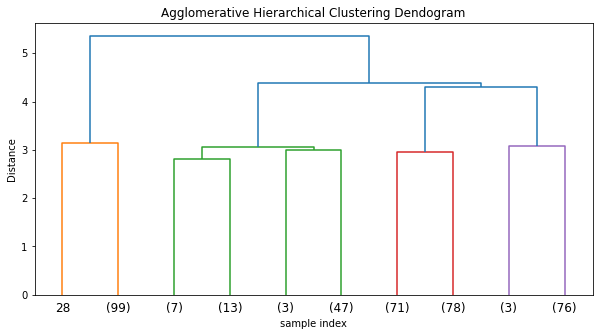

In [30]:
Z = linkage(car_data_scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(car_data_scaled))
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,truncate_mode='lastp',p=10)
plt.show()

From this dendrogram,it is clearly shows,that we should have distance threshold of 4 to get equally weighted clusters.

At distance threshold of 4 ,we would get 4 Clusters

In [31]:
hier_model = AgglomerativeClustering(n_clusters=None, affinity='euclidean',  linkage='average',distance_threshold=4)
hier_model.fit(car_data_scaled)
hier_predict=hier_model.labels_
silhouette_score(car_data_scaled,hier_predict)

0.44500158326103395

From the Hierarchical Clustering Method,we find the optimal number of Clusters as 4.

#### Insights

In Hierarchical,we can Choose the Number of Clusters based on distance from Dendrogram.It gives us Flexibility to choose the Number of Clusters based on the Dendrogram and the Counts in each cluster.But since the dataset is small,we coulndn't find any computational differences.But in real time we will be having Huge Datasets,so the Computational Cost will be More in Hierarchical Clustering.

In Kmeans ,we need to vary Clusters and the find the optimal number of Cluster using Sum of squared Variances.Finding the optimal number for K is difficult in KMeans Clustering.When compared to Hierarchical Clustering,the computational cost will be lower when we build model for huge datasets

#### Optimal Number of Clusters

In [32]:
car_data_scaled['labels']=kmeans_predict # We are assigning labels predicted using Kmeans
car_data['labels']=kmeans_predict # We are assigning labels predicted using Kmeans
features=['cyl', 'disp', 'hp', 'wt', 'acc', 'age', 'origin_1', 'origin_2'] # Selecting Features Columns
target=['mpg'] # Selecting Target Columns
car_data.groupby('labels').agg(['size','mean','std','min','max'])

mpg                                   cyl                              \
       size       mean       std   min   max size      mean       std min max   
labels                                                                          
0       149  23.686577  5.678773  15.0  39.0  149  5.087248  1.102411   4   8   
1       100  14.715000  2.416416   9.0  23.0  100  7.980000  0.200000   6   8   
2        79  30.450633  6.090048  18.0  46.6   79  4.101266  0.590414   3   6   
3        70  27.891429  6.723930  16.2  44.3   70  4.157143  0.500310   4   6   

       disp                                        hp                         \
       size        mean        std    min    max size        mean        std   
labels                                                                         
0       149  178.473154  58.421112   85.0  350.0  149   90.510067  13.626840   
1       100  346.370000  46.524384  231.0  455.0  100  156.470000  19.195146   
2        79  102.708861  23.140126   70.0  168.0   79   79.835443  17.819199   
3        70  109.142857  22.582079   68.0  183.0   70   80.928571  19.981928   

                       wt                                       acc  \
          min    max size         mean         std   min   max size   
labels                                                                
0        52.0  120.0  149  2848.523490  513.891520  1800  4060  149   
1       110.0  198.0  100  4126.910000  447.011357  3086  5140  100   
2        52.0  132.0   79  2221.227848  320.497248  1613  2930   79   
3        46.0  133.0   70  2423.300000  490.043191  1825  3820   70   

                                         age                              \
             mean       std   min   max size      mean       std min max   
labels                                                                     
0       16.561946  2.038187  11.3  22.1  149  6.140940  3.613077   1  13   
1       12.809550  1.687825   9.0  18.5  100  9.250000  2.917641   4  13   
2       16.172152  1.954937  11.4  21.0   79  5.556962  3.650595   1  13   
3       16.573714  2.613839  12.2  21.9   70  7.185714  3.469506   1  13   

       origin_1                   origin_2                   origin_3       \
           size mean  std min max     size mean  std min max     size mean   
labels                                                                       
0           149    1  0.0   1   1      149    0  0.0   0   0      149    0   
1           100    1  0.0   1   1      100    0  0.0   0   0      100    0   
2            79    0  0.0   0   0       79    0  0.0   0   0       79    1   
3            70    0  0.0   0   0       70    1  0.0   1   1       70    0   

                     
        std min max  
labels               
0       0.0   0   0  
1       0.0   0   0  
2       0.0   1   1  
3       0.0   0   0

From the above two Clustering Methods,we find the Optimal number of clustes as 4.

From the above table we can infer following points:

Cluster with label 1 is having displacement(346),hp(156),weight(4126) higher and mileage lower(14) when compared to other clusters.So we can Say it as High powered Vehicles.It belongs to Origin 1.

Cluster with label 2 is having displacement(102),hp(79),weight(2221) lower and mileage higher(30) when compared to other clusters.So we can say it as Low Powered Vehicles(Economy Vehicles).It belongs to Origin 3

Cluster with label 3 is having Similar Characteristics as Cluster 2 ,but the origin is differing between two clusters.So we can say it as Low Powered Vehicles(Economy Vehicles).It Belongs to Origin 2.

Cluster with label 0 is having Average displacement,hp,weight compared to Cluster 3 and mileage is higher when compared to Cluster 1.So we can Say it as (Medium Powered Vehicles).It belongs to Origin 1.

More number of Vehicles are grouped in Cluster 0,Since it is having balanced between power and mileage


These are the Possibe Reasons for having four Clusters in our data.


#### Linear Regression

In [33]:
cluster1x=car_data_scaled[car_data_scaled['labels']==0][features]
cluster1y=car_data_scaled[car_data_scaled['labels']==0][target]
cluster2x=car_data_scaled[car_data_scaled['labels']==1][features]
cluster2y=car_data_scaled[car_data_scaled['labels']==1][target]
cluster3x=car_data_scaled[car_data_scaled['labels']==2][features]
cluster3y=car_data_scaled[car_data_scaled['labels']==2][target]
cluster4x=car_data_scaled[car_data_scaled['labels']==3][features]
cluster4y=car_data_scaled[car_data_scaled['labels']==3][target]

We are assigning the data points to the different variables based on the labels generated from Clustering algorithm

In [34]:
def linear(x,y):
    linear_model=LinearRegression()
    linear_model.fit(x,y)
    for idx, col_name in enumerate(x.columns):
        print("The coefficient for {} is {}".format(col_name, linear_model.coef_[0][idx]))
    print("---------------------------------------------")
    print("The Accuracy of the model is",linear_model.score(x,y))

##### Cluster with Lable zero(Medium Powered Vehicles)

In [35]:
linear(cluster1x,cluster1y)

The coefficient for cyl is 0.07330460509987347
The coefficient for disp is -0.10012149438042604
The coefficient for hp is -0.3484589246257514
The coefficient for wt is -0.6211797741987747
The coefficient for acc is -0.13882860570668124
The coefficient for age is -0.3545869467966075
The coefficient for origin_1 is 0.0
The coefficient for origin_2 is 1.2835651096136452e-32
---------------------------------------------
The Accuracy of the model is 0.8091359012818905


From this Model with Cluster Zero,we can find that Weight is having higher coefficient.The Accuracy of the Model is good.

##### Cluster with Lable one(High Powered Vehicles)

In [36]:
linear(cluster2x,cluster2y)

The coefficient for cyl is -0.12471703450430997
The coefficient for disp is 0.08185161158834722
The coefficient for hp is -0.1630924241684939
The coefficient for wt is -0.21466688269886688
The coefficient for acc is -0.07033380635340541
The coefficient for age is -0.18233450685146207
The coefficient for origin_1 is 0.35780431225098064
The coefficient for origin_2 is 0.1192681040836603
---------------------------------------------
The Accuracy of the model is 0.5804849186073064


From this Model with Cluster One,we find most of the coeffients values is less.So None of the features are significant to find the mpg.So the accuracy of the Model is very low.

##### Cluster with Lable Two(low Powered Vehicles)

In [37]:
linear(cluster3x,cluster3y)

The coefficient for cyl is 0.13920624998517722
The coefficient for disp is 0.5809077440587215
The coefficient for hp is -0.18850428475794836
The coefficient for wt is -1.265932100457685
The coefficient for acc is 0.06981191980344194
The coefficient for age is -0.43027765724156186
The coefficient for origin_1 is 0.09722686899920283
The coefficient for origin_2 is 0.07292015174940211
---------------------------------------------
The Accuracy of the model is 0.6963474650393568


From this Model with Cluster Two,we find Weight is having signifiant Co-efficient value to find mpg.So the Accuaracy is good compared to other two models.

##### Cluster with Lable Three(low Powered Vehicles)

In [38]:
linear(cluster4x,cluster4y)

The coefficient for cyl is -0.15546492123574676
The coefficient for disp is -0.52950087438311
The coefficient for hp is -0.10447661622075781
The coefficient for wt is -0.6876668588982531
The coefficient for acc is 0.19636588458092893
The coefficient for age is -0.546554659370504
The coefficient for origin_1 is -0.010447079685388704
The coefficient for origin_2 is -0.02089415937077741
---------------------------------------------
The Accuracy of the model is 0.7419869573058069


From this Model with Cluster Three,We find Weight,Displacement & age is having significant coefficient value.So the accuracy of the model is good.

##### Without Clustering

In [39]:
linear(car_data_scaled[features],car_data_scaled[target])

The coefficient for cyl is -0.07783872234783135
The coefficient for disp is 0.302845634819659
The coefficient for hp is -0.16760855082526288
The coefficient for wt is -0.6835277017658982
The coefficient for acc is -0.010901126039009975
The coefficient for age is -0.36427742854527734
The coefficient for origin_1 is -0.180381260133536
The coefficient for origin_2 is -0.0050169827935975025
---------------------------------------------
The Accuracy of the model is 0.8258381935254372


Without Clustering,We can find Weight,displacement,age is having significant co-efficients values.The Overall Accuracy is good,but the coefficients value is more generalized.

##### Conclusion

From the Clustering Techinque,we can find inference about co-efficients for each cluster rather than finding for single dataset.

It will improve the Intrepretation as well we can find which attributes are impacting each clusters individually.

It will also improve the Prediction since we can target each clusters individually based on the features.

### Improvisation of dataset

Since this dataset was collected in 1983,it is having features older than current technology.So we should collect dataset for analysis for each year.

Also here more number of Vehicles are from Origin 1.This should be avoided since it will dominate other two origins.We should collect equally sized dataset from each origins.

Also more number of features can be added in the dataset with respect to each car's special features.

Since we having only less amount of data(398),the prediction may not be accurate.We should collect more data for better analysis.

Only three origins of cars are collected in the dataset.This should be imporved by collecting data of cars from different origins to make better analysis about the market.



## PART -2 

In [40]:
wine_data=pd.read_excel("Part2 - Company.xlsx") #Reading data from Excel
print("The Shape of the dataset is",wine_data.shape)
wine_data.head(10)

The Shape of the dataset is (61, 5)


A    B    C    D    Quality
0   47   27   45  108  Quality A
1  174  133  134  166  Quality B
2  159  163  135  131        NaN
3   61   23    3   44  Quality A
4   59   60    9   68  Quality A
5  153  140  154  199        NaN
6   34   28   78   22  Quality A
7  191  144  143  154        NaN
8  160  181  194  178  Quality B
9  145  178  158  141        NaN

The above dataset contains 61 observations and 5 attributes

In [41]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


It consists of 4 Continous features and one Target categorical variable which is quality.

In [42]:
wine_data.isnull().sum()

A           0
B           0
C           0
D           0
Quality    18
dtype: int64

Here the Quality variables contains 18 Null Values.We need to Impute this Values.

In [43]:
wine_data['Quality'].value_counts()

Quality A    26
Quality B    17
Name: Quality, dtype: int64

From this we infer that Quality A wines are more in number

In [44]:
wine_data.groupby('Quality').describe()

A                                                            \
          count        mean        std    min    25%    50%    75%    max   
Quality                                                                     
Quality A  26.0   58.769231  33.391385    3.0   36.5   53.5   89.5  110.0   
Quality B  17.0  167.176471  23.862196  132.0  142.0  170.0  185.0  200.0   

              B                                                              \
          count        mean        std    min     25%    50%     75%    max   
Quality                                                                       
Quality A  26.0   62.230769  33.733435    5.0   29.25   62.0   93.25  109.0   
Quality B  17.0  168.470588  19.310352  133.0  157.00  168.0  181.00  200.0   

              C                                                             \
          count        mean        std    min    25%    50%     75%    max   
Quality                                                                      
Quality A  26.0   53.000000  33.224088    3.0   19.0   58.0   75.75  109.0   
Quality B  17.0  173.470588  18.868352  134.0  164.0  176.0  189.00  200.0   

              D                                                             
          count        mean        std    min     25%    50%    75%    max  
Quality                                                                     
Quality A  26.0   51.807692  31.284526    3.0   31.25   46.5   71.0  110.0  
Quality B  17.0  165.411765  20.904721  132.0  150.00  168.0  179.0  198.0

From the above Table, We can infer that

Quality A wines are having lower chemical composition

Quality B wines are having higher chemical composition

In [45]:
features=wine_data[['A','B','C','D']]
features_scaled=pd.DataFrame(StandardScaler().fit_transform(features), columns = features.columns)# Scaling the Variables

In [46]:
kmean_wine=KMeans(n_clusters=2, n_init=5,random_state=3)# Creating 2 Clusters since we are having only two Quality Wines
kmean_wine.fit(features_scaled)
labels=kmean_wine.labels_

In [47]:
wine_data['labels']=labels # Creating new column in dataframe as Lablels with cluster predicted labels

In [48]:
wine_data.groupby('labels').describe()

A                                                                B  \
       count       mean        std    min     25%    50%     75%    max count   
labels                                                                          
0       28.0   58.75000  33.118894    3.0   32.75   53.5   88.75  110.0  28.0   
1       33.0  169.30303  21.061643  132.0  157.00  170.0  186.00  200.0  33.0   

                                                                       C  \
              mean        std    min     25%    50%     75%    max count   
labels                                                                     
0        60.928571  32.838470    5.0   31.75   60.5   91.75  109.0  28.0   
1       163.909091  18.853653  133.0  145.00  163.0  178.00  200.0  33.0   

                                                                       D  \
              mean        std    min     25%    50%     75%    max count   
labels                                                                     
0        49.750000  34.126806    3.0   14.75   56.5   75.25  109.0  28.0   
1       168.666667  19.900796  134.0  154.00  166.0  185.00  200.0  33.0   

                                                                   
              mean        std    min     25%    50%    75%    max  
labels                                                             
0        53.000000  31.757181    3.0   31.75   46.5   73.0  110.0  
1       166.606061  22.710047  130.0  150.00  168.0  183.0  199.0

From this we can infer that ,

label 0 - It is having lower chemical composition which means that it is low Quality wine(Quality A)

label 1 - It is having higher chemical Composition which means that it is High Quality wine(Quality B)

In [49]:
silhouette_score(features_scaled,labels)

0.6891674125195145

We are getting silhouette score of 0.68 which means that our within cluster variance is low.

In [50]:
mapping={0:"Quality A",1:"Quality B"}

Since we know that low quality wines are mentioned as Quality A and high quality wines are mentioned as Quality B in our dataset.We are mapping 
labels to the appropriate Quality.

In [51]:
wine_data['labels']=wine_data['labels'].replace(mapping)
wine_data

A    B    C    D    Quality     labels
0    47   27   45  108  Quality A  Quality A
1   174  133  134  166  Quality B  Quality B
2   159  163  135  131        NaN  Quality B
3    61   23    3   44  Quality A  Quality A
4    59   60    9   68  Quality A  Quality A
5   153  140  154  199        NaN  Quality B
6    34   28   78   22  Quality A  Quality A
7   191  144  143  154        NaN  Quality B
8   160  181  194  178  Quality B  Quality B
9   145  178  158  141        NaN  Quality B
10   76   94  107   37  Quality A  Quality A
11  138  200  153  192  Quality B  Quality B
12   27  106   57   37  Quality A  Quality A
13   45   76   56   57  Quality A  Quality A
14  186  142  146  174        NaN  Quality B
15  196  145  166  132  Quality B  Quality B
16    4   61   72   98  Quality A  Quality A
17   96  109   75   34  Quality A  Quality A
18  167  171  163  191        NaN  Quality B
19  196  178  165  177  Quality B  Quality B
20  159  181  142  166  Quality B  Quality B
21    5  100   32  110  Quality A  Quality A
22    3   63  109   67  Quality A  Quality A
23  171  185  181  183        NaN  Quality B
24  101  104   95   49  Quality A  Quality A
25  103   74   59   17  Quality A  Quality A
26  170  153  181  176  Quality B  Quality B
27  193  169  199  155        NaN  Quality B
28   85   58   44   32  Quality A  Quality A
29   29   49    6   35        NaN  Quality A
30  135  163  194  168  Quality B  Quality B
31  142  159  176  150  Quality B  Quality B
32  161  138  143  139        NaN  Quality B
33  170  174  190  181  Quality B  Quality B
34  183  142  164  186  Quality B  Quality B
35  181  147  174  130        NaN  Quality B
36  185  168  160  151  Quality B  Quality B
37  132  157  174  138  Quality B  Quality B
38   44  104    8   21  Quality A  Quality A
39  102    5   59   72  Quality A  Quality A
40  179  143  189  177        NaN  Quality B
41   73   22   83   31  Quality A  Quality A
42   48   68   98   51  Quality A  Quality A
43  169  184  200  133  Quality B  Quality B
44   22    9   25   76  Quality A  Quality A
45   44   90    6    8  Quality A  Quality A
46  197  173  165  197        NaN  Quality B
47   28   91   17   17  Quality A  Quality A
48  197  161  182  198  Quality B  Quality B
49  136  199  189  141  Quality B  Quality B
50   47   44   66   41  Quality A  Quality A
51  110   33   76    3  Quality A  Quality A
52  188  178  175  162        NaN  Quality B
53   91   13   14   88  Quality A  Quality A
54   70   96   70  103  Quality A  Quality A
55  103   60   15   56  Quality A  Quality A
56  200  186  185  179  Quality B  Quality B
57  137  182  165  199        NaN  Quality B
58   88   39    9  102        NaN  Quality A
59  180  157  192  198        NaN  Quality B
60  157  135  135  156        NaN  Quality B

From this we can see that most of the Null values are converted into Quality B (High Quality Wines)

In [52]:
wine_data.drop('Quality',axis=1,inplace=True) # Dropping the Original Quality Variable
wine_data.rename(columns={'labels':'Quality'}, inplace=True) # Renaming Lables column to Quality
wine_data

A    B    C    D    Quality
0    47   27   45  108  Quality A
1   174  133  134  166  Quality B
2   159  163  135  131  Quality B
3    61   23    3   44  Quality A
4    59   60    9   68  Quality A
5   153  140  154  199  Quality B
6    34   28   78   22  Quality A
7   191  144  143  154  Quality B
8   160  181  194  178  Quality B
9   145  178  158  141  Quality B
10   76   94  107   37  Quality A
11  138  200  153  192  Quality B
12   27  106   57   37  Quality A
13   45   76   56   57  Quality A
14  186  142  146  174  Quality B
15  196  145  166  132  Quality B
16    4   61   72   98  Quality A
17   96  109   75   34  Quality A
18  167  171  163  191  Quality B
19  196  178  165  177  Quality B
20  159  181  142  166  Quality B
21    5  100   32  110  Quality A
22    3   63  109   67  Quality A
23  171  185  181  183  Quality B
24  101  104   95   49  Quality A
25  103   74   59   17  Quality A
26  170  153  181  176  Quality B
27  193  169  199  155  Quality B
28   85   58   44   32  Quality A
29   29   49    6   35  Quality A
30  135  163  194  168  Quality B
31  142  159  176  150  Quality B
32  161  138  143  139  Quality B
33  170  174  190  181  Quality B
34  183  142  164  186  Quality B
35  181  147  174  130  Quality B
36  185  168  160  151  Quality B
37  132  157  174  138  Quality B
38   44  104    8   21  Quality A
39  102    5   59   72  Quality A
40  179  143  189  177  Quality B
41   73   22   83   31  Quality A
42   48   68   98   51  Quality A
43  169  184  200  133  Quality B
44   22    9   25   76  Quality A
45   44   90    6    8  Quality A
46  197  173  165  197  Quality B
47   28   91   17   17  Quality A
48  197  161  182  198  Quality B
49  136  199  189  141  Quality B
50   47   44   66   41  Quality A
51  110   33   76    3  Quality A
52  188  178  175  162  Quality B
53   91   13   14   88  Quality A
54   70   96   70  103  Quality A
55  103   60   15   56  Quality A
56  200  186  185  179  Quality B
57  137  182  165  199  Quality B
58   88   39    9  102  Quality A
59  180  157  192  198  Quality B
60  157  135  135  156  Quality B

In [53]:
wine_data['Quality'].value_counts()

Quality B    33
Quality A    28
Name: Quality, dtype: int64

We are able to Impute the Missing Values with the help of Clustering to group the similar point to appropriate Clusters.

Here we have two Clusters,

Quality A- Low Quality wines are grouped under this Category

Quality B- High Quality wines are grouped under this Category

## PART -3

In [54]:
vehicle_data=pd.read_csv("Part3 - vehicle.csv") #Loading the Dataset
print("The Shape of the Vehicle dataframe is",vehicle_data.shape) #Printing the shape of the dataframe
vehicle_data.head() # Printing the first five Records

The Shape of the Vehicle dataframe is (846, 19)


compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

### Data Cleansing

In [55]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

From this we can infer that all the attributes are Numerical Variables except class which is the Categorical Variable(Target Variable).Also we can see that there some null values in the dataframe


In [56]:
vehicle_data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

Here we can find there are some missing Values in most of the Columns.We can impute those values using Medina of those columns through simpute Imputer.

In [57]:
columns_null_list=vehicle_data.columns[vehicle_data.isnull().any()]
for column in columns_null_list:
    vehicle_data[column]=vehicle_data[column].fillna(vehicle_data[column].median())
vehicle_data.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

We Imputed the Missing Values with the Median of the appropriate columns.

#### Preprocessing the data

In [58]:
vehicle_mapping={'van':0,'car':1,'bus':2}
vehicle_data['class']=vehicle_data['class'].replace(vehicle_mapping)
vehicle_data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      0  
1             189.0            199      0  
2             188.0            196      1  
3             199.0            207      0  
4             180.0            183      2

## Data Analysis & Visualization

In [59]:
vehicle_data.describe()

compactness  circularity  distance_circularity  radius_ratio  \
count   846.000000   846.000000            846.000000    846.000000   
mean     93.678487    44.823877             82.100473    168.874704   
std       8.234474     6.134272             15.741569     33.401356   
min      73.000000    33.000000             40.000000    104.000000   
25%      87.000000    40.000000             70.000000    141.000000   
50%      93.000000    44.000000             80.000000    167.000000   
75%     100.000000    49.000000             98.000000    195.000000   
max     119.000000    59.000000            112.000000    333.000000   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
count            846.000000               846.000000     846.000000   
mean              61.677305                 8.567376     168.887707   
std                7.882188                 4.601217      33.197710   
min               47.000000                 2.000000     112.000000   
25%               57.000000                 7.000000     147.000000   
50%               61.000000                 8.000000     157.000000   
75%               65.000000                10.000000     198.000000   
max              138.000000                55.000000     265.000000   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
count     846.000000              846.000000                 846.000000   
mean       40.936170               20.580378                 147.998818   
std         7.811882                2.588558                  14.515652   
min        26.000000               17.000000                 118.000000   
25%        33.000000               19.000000                 137.000000   
50%        43.000000               20.000000                 146.000000   
75%        46.000000               23.000000                 159.000000   
max        61.000000               29.000000                 188.000000   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
count       846.000000         846.000000                 846.000000   
mean        188.596927         439.314421                 174.706856   
std          31.360427         176.496341                  32.546277   
min         130.000000         184.000000                 109.000000   
25%         167.000000         318.250000                 149.000000   
50%         179.000000         363.500000                 173.500000   
75%         217.000000         586.750000                 198.000000   
max         320.000000        1018.000000                 268.000000   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
count                   846.000000      846.000000        846.000000   
mean                     72.443262        6.361702         12.600473   
std                       7.468734        4.903244          8.930962   
min                      59.000000        0.000000          0.000000   
25%                      67.000000        2.000000          5.000000   
50%                      71.500000        6.000000         11.000000   
75%                      75.000000        9.000000         19.000000   
max                     135.000000       22.000000         41.000000   

       skewness_about.2  hollows_ratio       class  
count        846.000000     846.000000  846.000000  
mean         188.918440     195.632388    1.022459  
std            6.152247       7.438797    0.702130  
min          176.000000     181.000000    0.000000  
25%          184.000000     190.250000    1.000000  
50%          188.000000     197.000000    1.000000  
75%          193.000000     201.000000    2.000000  
max          206.000000     211.000000    2.000000

In [60]:
vehicle_data.skew(numeric_only=True)

compactness                    0.381271
circularity                    0.264928
distance_circularity           0.108718
radius_ratio                   0.397572
pr.axis_aspect_ratio           3.835392
max.length_aspect_ratio        6.778394
scatter_ratio                  0.608710
elongatedness                  0.046951
pr.axis_rectangularity         0.774406
max.length_rectangularity      0.256359
scaled_variance                0.655598
scaled_variance.1              0.845345
scaled_radius_of_gyration      0.279910
scaled_radius_of_gyration.1    2.089979
skewness_about                 0.780813
skewness_about.1               0.689014
skewness_about.2               0.249985
hollows_ratio                 -0.226341
class                         -0.031106
dtype: float64

From this the skewness values for pr.axis_aspect_ratio,max.length_aspect_ratio,scaled_radius_of_gyration are heavily skewed

In [61]:
vehicle_data.kurtosis(numeric_only=True)

compactness                    -0.535275
circularity                    -0.910125
distance_circularity           -0.967704
radius_ratio                    0.329029
pr.axis_aspect_ratio           29.968642
max.length_aspect_ratio        58.375455
scatter_ratio                  -0.613414
elongatedness                  -0.864475
pr.axis_rectangularity         -0.379654
max.length_rectangularity      -0.770098
scaled_variance                 0.131983
scaled_variance.1              -0.196110
scaled_radius_of_gyration      -0.490306
scaled_radius_of_gyration.1    11.526959
skewness_about                  0.117607
skewness_about.1               -0.140974
skewness_about.2               -0.585847
hollows_ratio                  -0.813435
class                          -0.967863
dtype: float64

From this the Kurtosis values for the attributes is very high in pr.axis_aspect_ratio,max.length_aspect_ratio,scaled_radius_of_gyration.

### Univariate Analysis

In [62]:
def plots(feature):
    fig = plt.figure(constrained_layout = True, figsize=(10,3))
    gs = gridspec.GridSpec(nrows=1, ncols=4, figure=fig)

    ax1 = fig.add_subplot(gs[0,:3])    
    sns.distplot(vehicle_data[feature]);
    ax2 = fig.add_subplot(gs[0,3])    
    sns.boxplot(vehicle_data[feature]);

Here we are defined function for drawing distplot & boxplot to visualize each attribute distribution

##### compactness

Skewness : 0.38127063263996497
Kurtosis : -0.5352753538997588
Median : 93.0


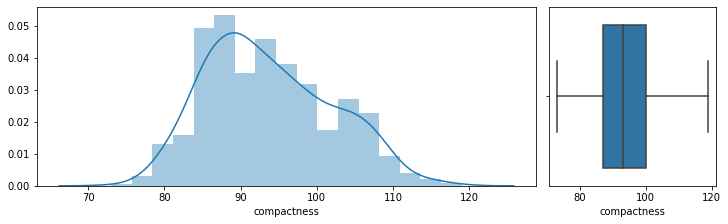

In [63]:
print("Skewness :",vehicle_data['compactness'].skew())
print("Kurtosis :",vehicle_data['compactness'].kurtosis())
print("Median :", vehicle_data['compactness'].median())
plots('compactness')

Here the Central value is around 93 and the compactness column doest not have any outliers and skewness,kurtosis  also acceptable.

##### circularity 

Skewness : 0.2649279874901165
Kurtosis : -0.9101249152031197
Median : 44.0


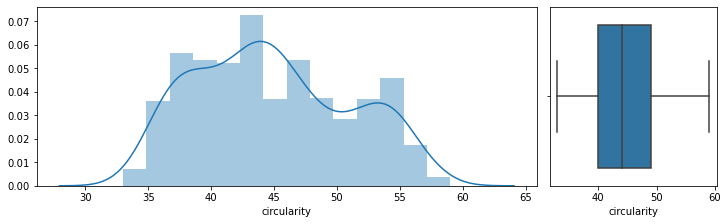

In [64]:
print("Skewness :",vehicle_data['circularity'].skew())
print("Kurtosis :",vehicle_data['circularity'].kurtosis())
print("Median :", vehicle_data['circularity'].median())
plots('circularity')

Here the Central value is around 44 and the circularity column doest not have any outliers and skewness,kurtosis also acceptable.

##### distance_circularity

Skewness : 0.10871801180935975
Kurtosis : -0.9677035134563123
Median : 80.0


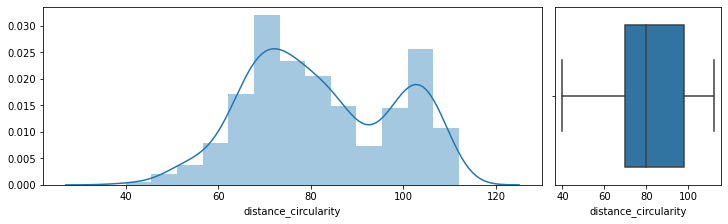

In [65]:
print("Skewness :",vehicle_data['distance_circularity'].skew())
print("Kurtosis :",vehicle_data['distance_circularity'].kurtosis())
print("Median :", vehicle_data['distance_circularity'].median())
plots('distance_circularity')

Here the Central value is around 80 and the distance_circularity column doest not have any outliers and skewness,kurtosis also acceptable.The distribution looks like bimodal,since it is having two peaks.

##### radius_ratio

Skewness : 0.3975716412698015
Kurtosis : 0.3290290998186727
Median : 167.0


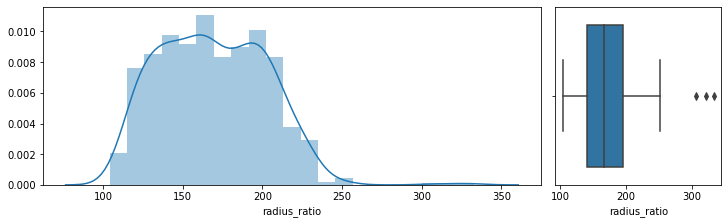

In [66]:
print("Skewness :",vehicle_data['radius_ratio'].skew())
print("Kurtosis :",vehicle_data['radius_ratio'].kurtosis())
print("Median :", vehicle_data['radius_ratio'].median())
plots('radius_ratio')

Here the Central value is around 167 and the radius_ratio has few outliers and skewness,kurtosis also acceptable.We can fix the outliers by applying transformation

##### pr.axis_aspect_ratio

Skewness : 3.8353916077858434
Kurtosis : 29.968641900971317
Median : 61.0


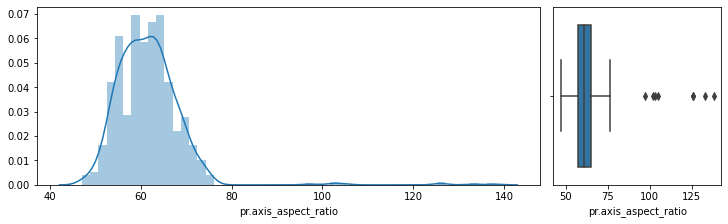

In [67]:
print("Skewness :",vehicle_data['pr.axis_aspect_ratio'].skew())
print("Kurtosis :",vehicle_data['pr.axis_aspect_ratio'].kurtosis())
print("Median :", vehicle_data['pr.axis_aspect_ratio'].median())
plots('pr.axis_aspect_ratio')

Here the Central value is around 61 and the pr.axis_aspect_ratio has many outliers and skewness,kurtosis also is very high.We can fix the outliers by applying transformation

##### max.length_aspect_ratio

Skewness : 6.7783936191089476
Kurtosis : 58.37545547363182
Median : 8.0


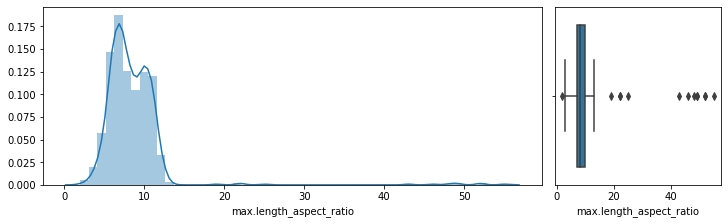

In [68]:
print("Skewness :",vehicle_data['max.length_aspect_ratio'].skew())
print("Kurtosis :",vehicle_data['max.length_aspect_ratio'].kurtosis())
print("Median :", vehicle_data['max.length_aspect_ratio'].median())
plots('max.length_aspect_ratio')

Here the Central value is around 61 and the pr.axis_aspect_ratio has many outliers and skewness,kurtosis also is very high.We can fix the outliers by applying transformation

##### scatter_ratio

Skewness : 0.6087097328672928
Kurtosis : -0.6134137724073754
Median : 157.0


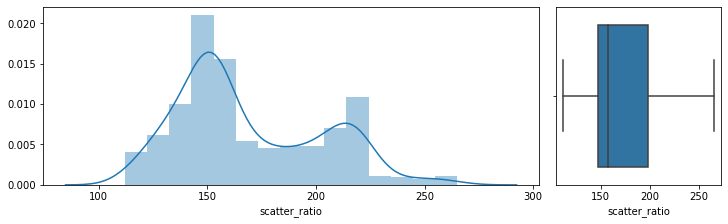

In [69]:
print("Skewness :",vehicle_data['scatter_ratio'].skew())
print("Kurtosis :",vehicle_data['scatter_ratio'].kurtosis())
print("Median :", vehicle_data['scatter_ratio'].median())
plots('scatter_ratio')

Here the Central value is around 157 and the scatter_ratio has no outliers and skewness,kurtosis values are acceptable.The distribution looks like bimodal,since it is having two peaks.

##### elongatedness

Skewness : 0.046951051315584164
Kurtosis : -0.8644745826485853
Median : 43.0


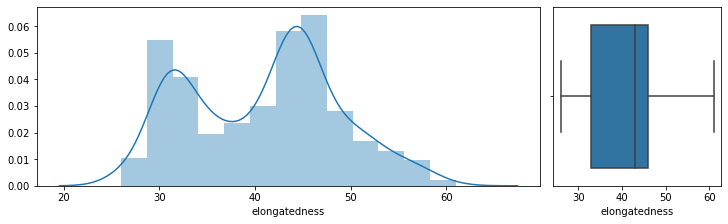

In [70]:
print("Skewness :",vehicle_data['elongatedness'].skew())
print("Kurtosis :",vehicle_data['elongatedness'].kurtosis())
print("Median :", vehicle_data['elongatedness'].median())
plots('elongatedness')

Here the Central value is around 43 and the elongatedness has no outliers and skewness,kurtosis values are acceptable.The distribution looks like bimodal,since it is having two peaks.

##### pr.axis_rectangularity

Skewness : 0.7744056757899445
Kurtosis : -0.3796542875430853
Median : 20.0


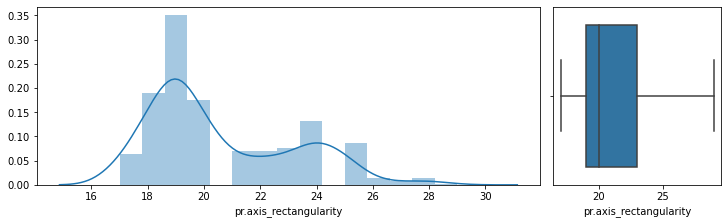

In [71]:
print("Skewness :",vehicle_data['pr.axis_rectangularity'].skew())
print("Kurtosis :",vehicle_data['pr.axis_rectangularity'].kurtosis())
print("Median :", vehicle_data['pr.axis_rectangularity'].median())
plots('pr.axis_rectangularity')

Here the Central value is around 20 and the pr.axis_rectangularity has no outliers and skewness,kurtosis values are acceptable.The distribution is bimodal

##### max.length_rectangularity

Skewness : 0.2563591641353724
Kurtosis : -0.7700982384102399
Median : 146.0


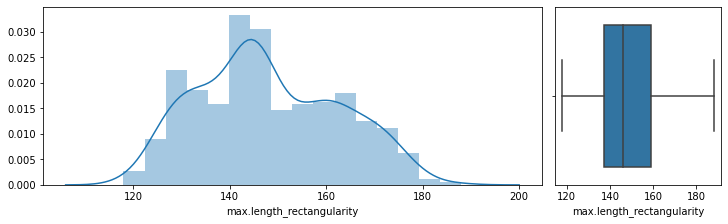

In [72]:
print("Skewness :",vehicle_data['max.length_rectangularity'].skew())
print("Kurtosis :",vehicle_data['max.length_rectangularity'].kurtosis())
print("Median :", vehicle_data['max.length_rectangularity'].median())
plots('max.length_rectangularity')

Here the Central value is around 146 and the max.length_rectangularity has no outliers and skewness,kurtosis values are acceptable.

##### scaled_variance

Skewness : 0.6555976294220067
Kurtosis : 0.1319827205145616
Median : 179.0


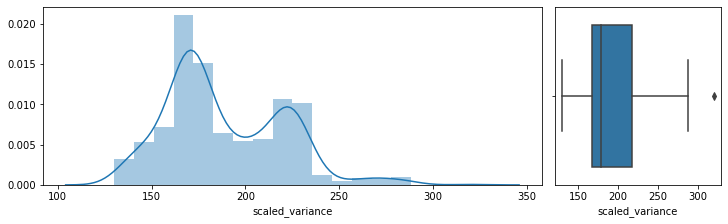

In [73]:
print("Skewness :",vehicle_data['scaled_variance'].skew())
print("Kurtosis :",vehicle_data['scaled_variance'].kurtosis())
print("Median :", vehicle_data['scaled_variance'].median())
plots('scaled_variance')

Here the Central value is around 179 and the scaled_variance has only one outlier and skewness,kurtosis values are acceptable.The distribution looks like bimodal,since it is having two peaks.We can treat the outliers by applying transformation.

##### scaled_variance.1

Skewness : 0.8453454281630146
Kurtosis : -0.19611040527880963
Median : 363.5


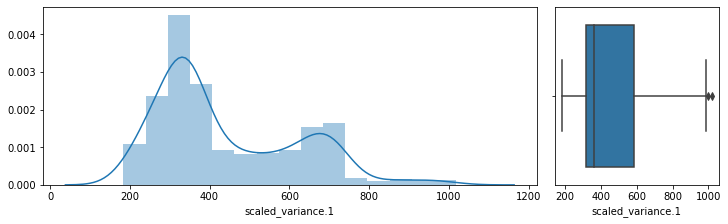

In [74]:
print("Skewness :",vehicle_data['scaled_variance.1'].skew())
print("Kurtosis :",vehicle_data['scaled_variance.1'].kurtosis())
print("Median :", vehicle_data['scaled_variance.1'].median())
plots('scaled_variance.1')

Here the Central value is around 43 and the scaled_variance.1 has few outliers and skewness,kurtosis values are acceptable.The distribution looks like bimodal,since it is having two peaks.We need to fix the outliers by applying transformation

##### scaled_radius_of_gyration

Skewness : 0.27990964799345835
Kurtosis : -0.4903056740945484
Median : 173.5


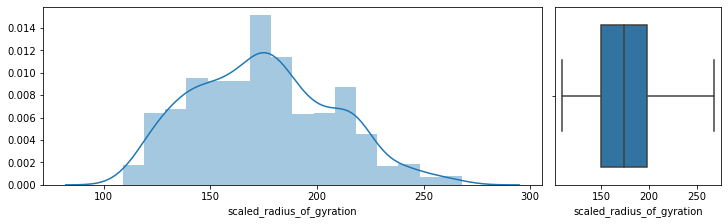

In [75]:
print("Skewness :",vehicle_data['scaled_radius_of_gyration'].skew())
print("Kurtosis :",vehicle_data['scaled_radius_of_gyration'].kurtosis())
print("Median :", vehicle_data['scaled_radius_of_gyration'].median())
plots('scaled_radius_of_gyration')

Here the Central value is around 174 and the scaled_radius_of_gyration has no outliers and skewness,kurtosis values are acceptable.

##### scaled_radius_of_gyration.1

Skewness : 2.0899787533912066
Kurtosis : 11.526958802323309
Median : 71.5


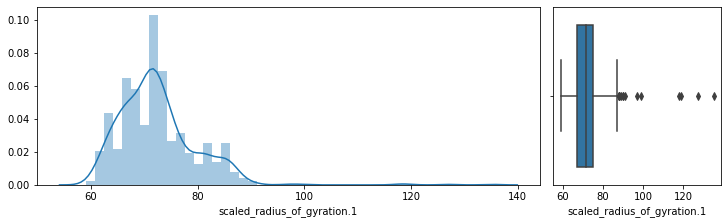

In [76]:
print("Skewness :",vehicle_data['scaled_radius_of_gyration.1'].skew())
print("Kurtosis :",vehicle_data['scaled_radius_of_gyration.1'].kurtosis())
print("Median :", vehicle_data['scaled_radius_of_gyration.1'].median())
plots('scaled_radius_of_gyration.1')

Here the Central value is around 72 and the scaled_radius_of_gyration.1 has many outliers and skewness,kurtosis values are very high.We need to fix this by applying transformation

##### skewness_about

Skewness : 0.7808132397211246
Kurtosis : 0.11760686813578047
Median : 6.0


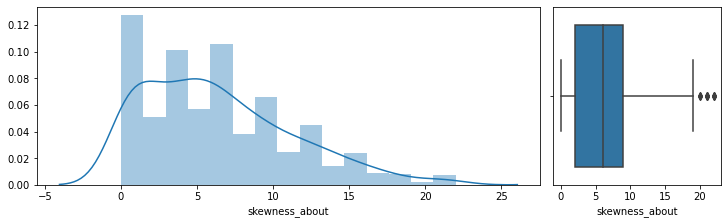

In [77]:
print("Skewness :",vehicle_data['skewness_about'].skew())
print("Kurtosis :",vehicle_data['skewness_about'].kurtosis())
print("Median :", vehicle_data['skewness_about'].median())
plots('skewness_about')

Here the Central value is around 6 and the skewness_about has few outliers and skewness,kurtosis values are acceptable.We need to treat the outliers by applying transformation

##### skewness_about.1

Skewness : 0.6890143067342678
Kurtosis : -0.14097361552800525
Median : 11.0


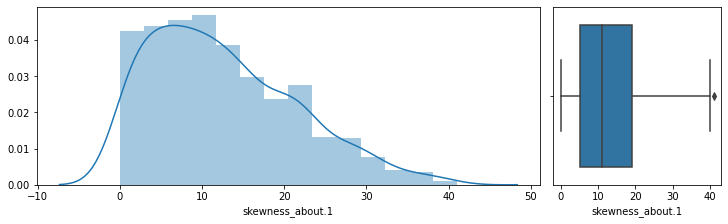

In [78]:
print("Skewness :",vehicle_data['skewness_about.1'].skew())
print("Kurtosis :",vehicle_data['skewness_about.1'].kurtosis())
print("Median :", vehicle_data['skewness_about.1'].median())
plots('skewness_about.1')

Here the Central value is around 11 and the skewness_about.1 has one outlier and skewness,kurtosis values are acceptable.We need to treat the outliers by applying transformation

##### skewness_about.2

Skewness : 0.24998506992542593
Kurtosis : -0.5858466838538523
Median : 188.0


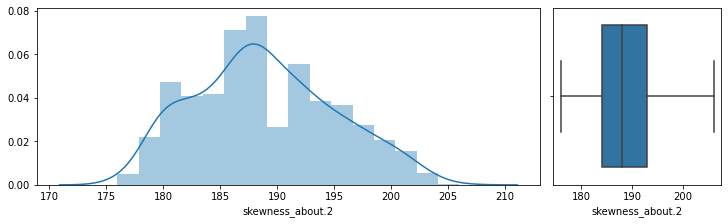

In [79]:
print("Skewness :",vehicle_data['skewness_about.2'].skew())
print("Kurtosis :",vehicle_data['skewness_about.2'].kurtosis())
print("Median :", vehicle_data['skewness_about.2'].median())
plots('skewness_about.2')

Here the Central value is around 188 and the skewness_about.2 has no outliers and skewness,kurtosis values are acceptable.

##### hollows_ratio

Skewness : -0.22634128032982512
Kurtosis : -0.8134350378917534
Median : 197.0


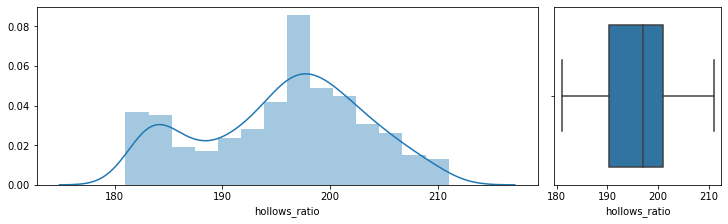

In [80]:
print("Skewness :",vehicle_data['hollows_ratio'].skew())
print("Kurtosis :",vehicle_data['hollows_ratio'].kurtosis())
print("Median :", vehicle_data['hollows_ratio'].median())
plots('hollows_ratio')

Here the Central value is around 197 and the hollows_ratio has no outliers and skewness,kurtosis values are acceptable.It has bimodal distribution

#### Outliers Treatment

95th Quantile Value of  radius_ratio is : 222.0
Skewness of  radius_ratio is : 0.11510977853779951
Kurtosis of  radius_ratio is : -0.9463922604728072
------------------------------------------------------------------
95th Quantile Value of  pr.axis_aspect_ratio is : 71.0
Skewness of  pr.axis_aspect_ratio is : 0.15360682555222452
Kurtosis of  pr.axis_aspect_ratio is : -0.522148499793408
------------------------------------------------------------------
95th Quantile Value of  max.length_aspect_ratio is : 12.0
Skewness of  max.length_aspect_ratio is : 0.07099339241777465
Kurtosis of  max.length_aspect_ratio is : -0.8459137930203906
------------------------------------------------------------------
95th Quantile Value of  scaled_variance is : 234.0
Skewness of  scaled_variance is : 0.5978432147921666
Kurtosis of  scaled_variance is : -0.11769649916388003
------------------------------------------------------------------
95th Quantile Value of  scaled_variance.1 is : 728.0
Skewness of  sca

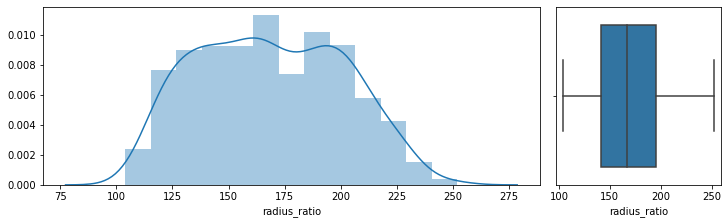

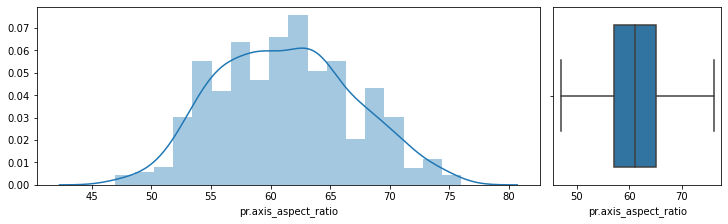

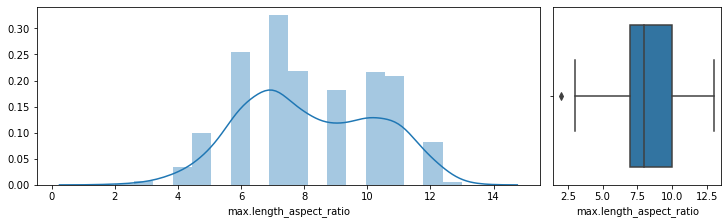

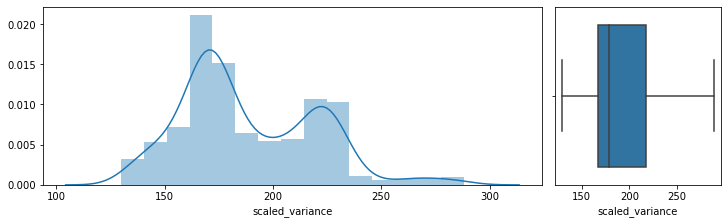

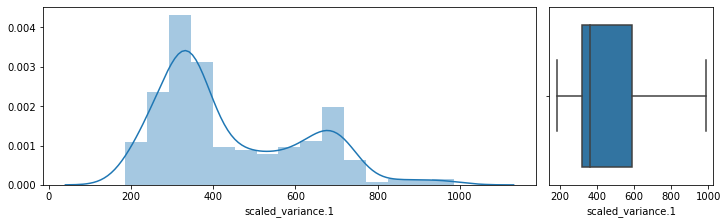

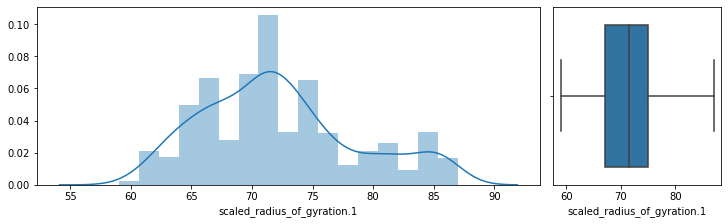

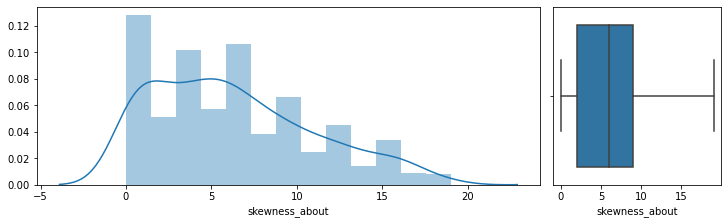

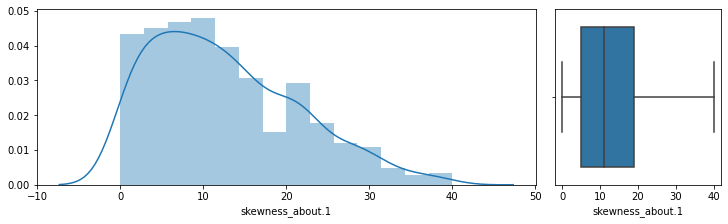

In [81]:
outliers_column=['radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_variance','scaled_variance.1','scaled_radius_of_gyration.1','skewness_about',
                'skewness_about.1']
for column in outliers_column:
    Q1 = vehicle_data[column].quantile(0.25)
    Q3 = vehicle_data[column].quantile(0.75)
    q95th = vehicle_data[column].quantile(0.95)
    IQR = Q3 - Q1
    UW = Q3 + 1.5*IQR
    vehicle_data[column] = np.where(vehicle_data[column] > UW, q95th, vehicle_data[column])
    plots(column)
    print("95th Quantile Value of ",column,"is :",q95th)
    print("Skewness of ",column,"is :",vehicle_data[column].skew())
    print("Kurtosis of ",column,"is :",vehicle_data[column].kurtosis())
    print("------------------------------------------------------------------")

Here,we are Replacing outliers with the 95th quantile value.

From the above Outliers Treatment,We have removed the Outliers and reduced the skewness and Kurtosis Values.

###### class (Target Variable)

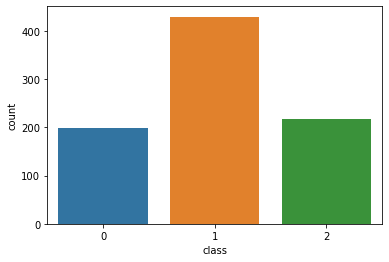

In [82]:
sns.countplot(vehicle_data['class']);

0-van   1-car   2-bus

From this we can infer that the counts of car is more when compared to other 2 categories.Also van is having lowest count among all three.

### Bivariate Analysis

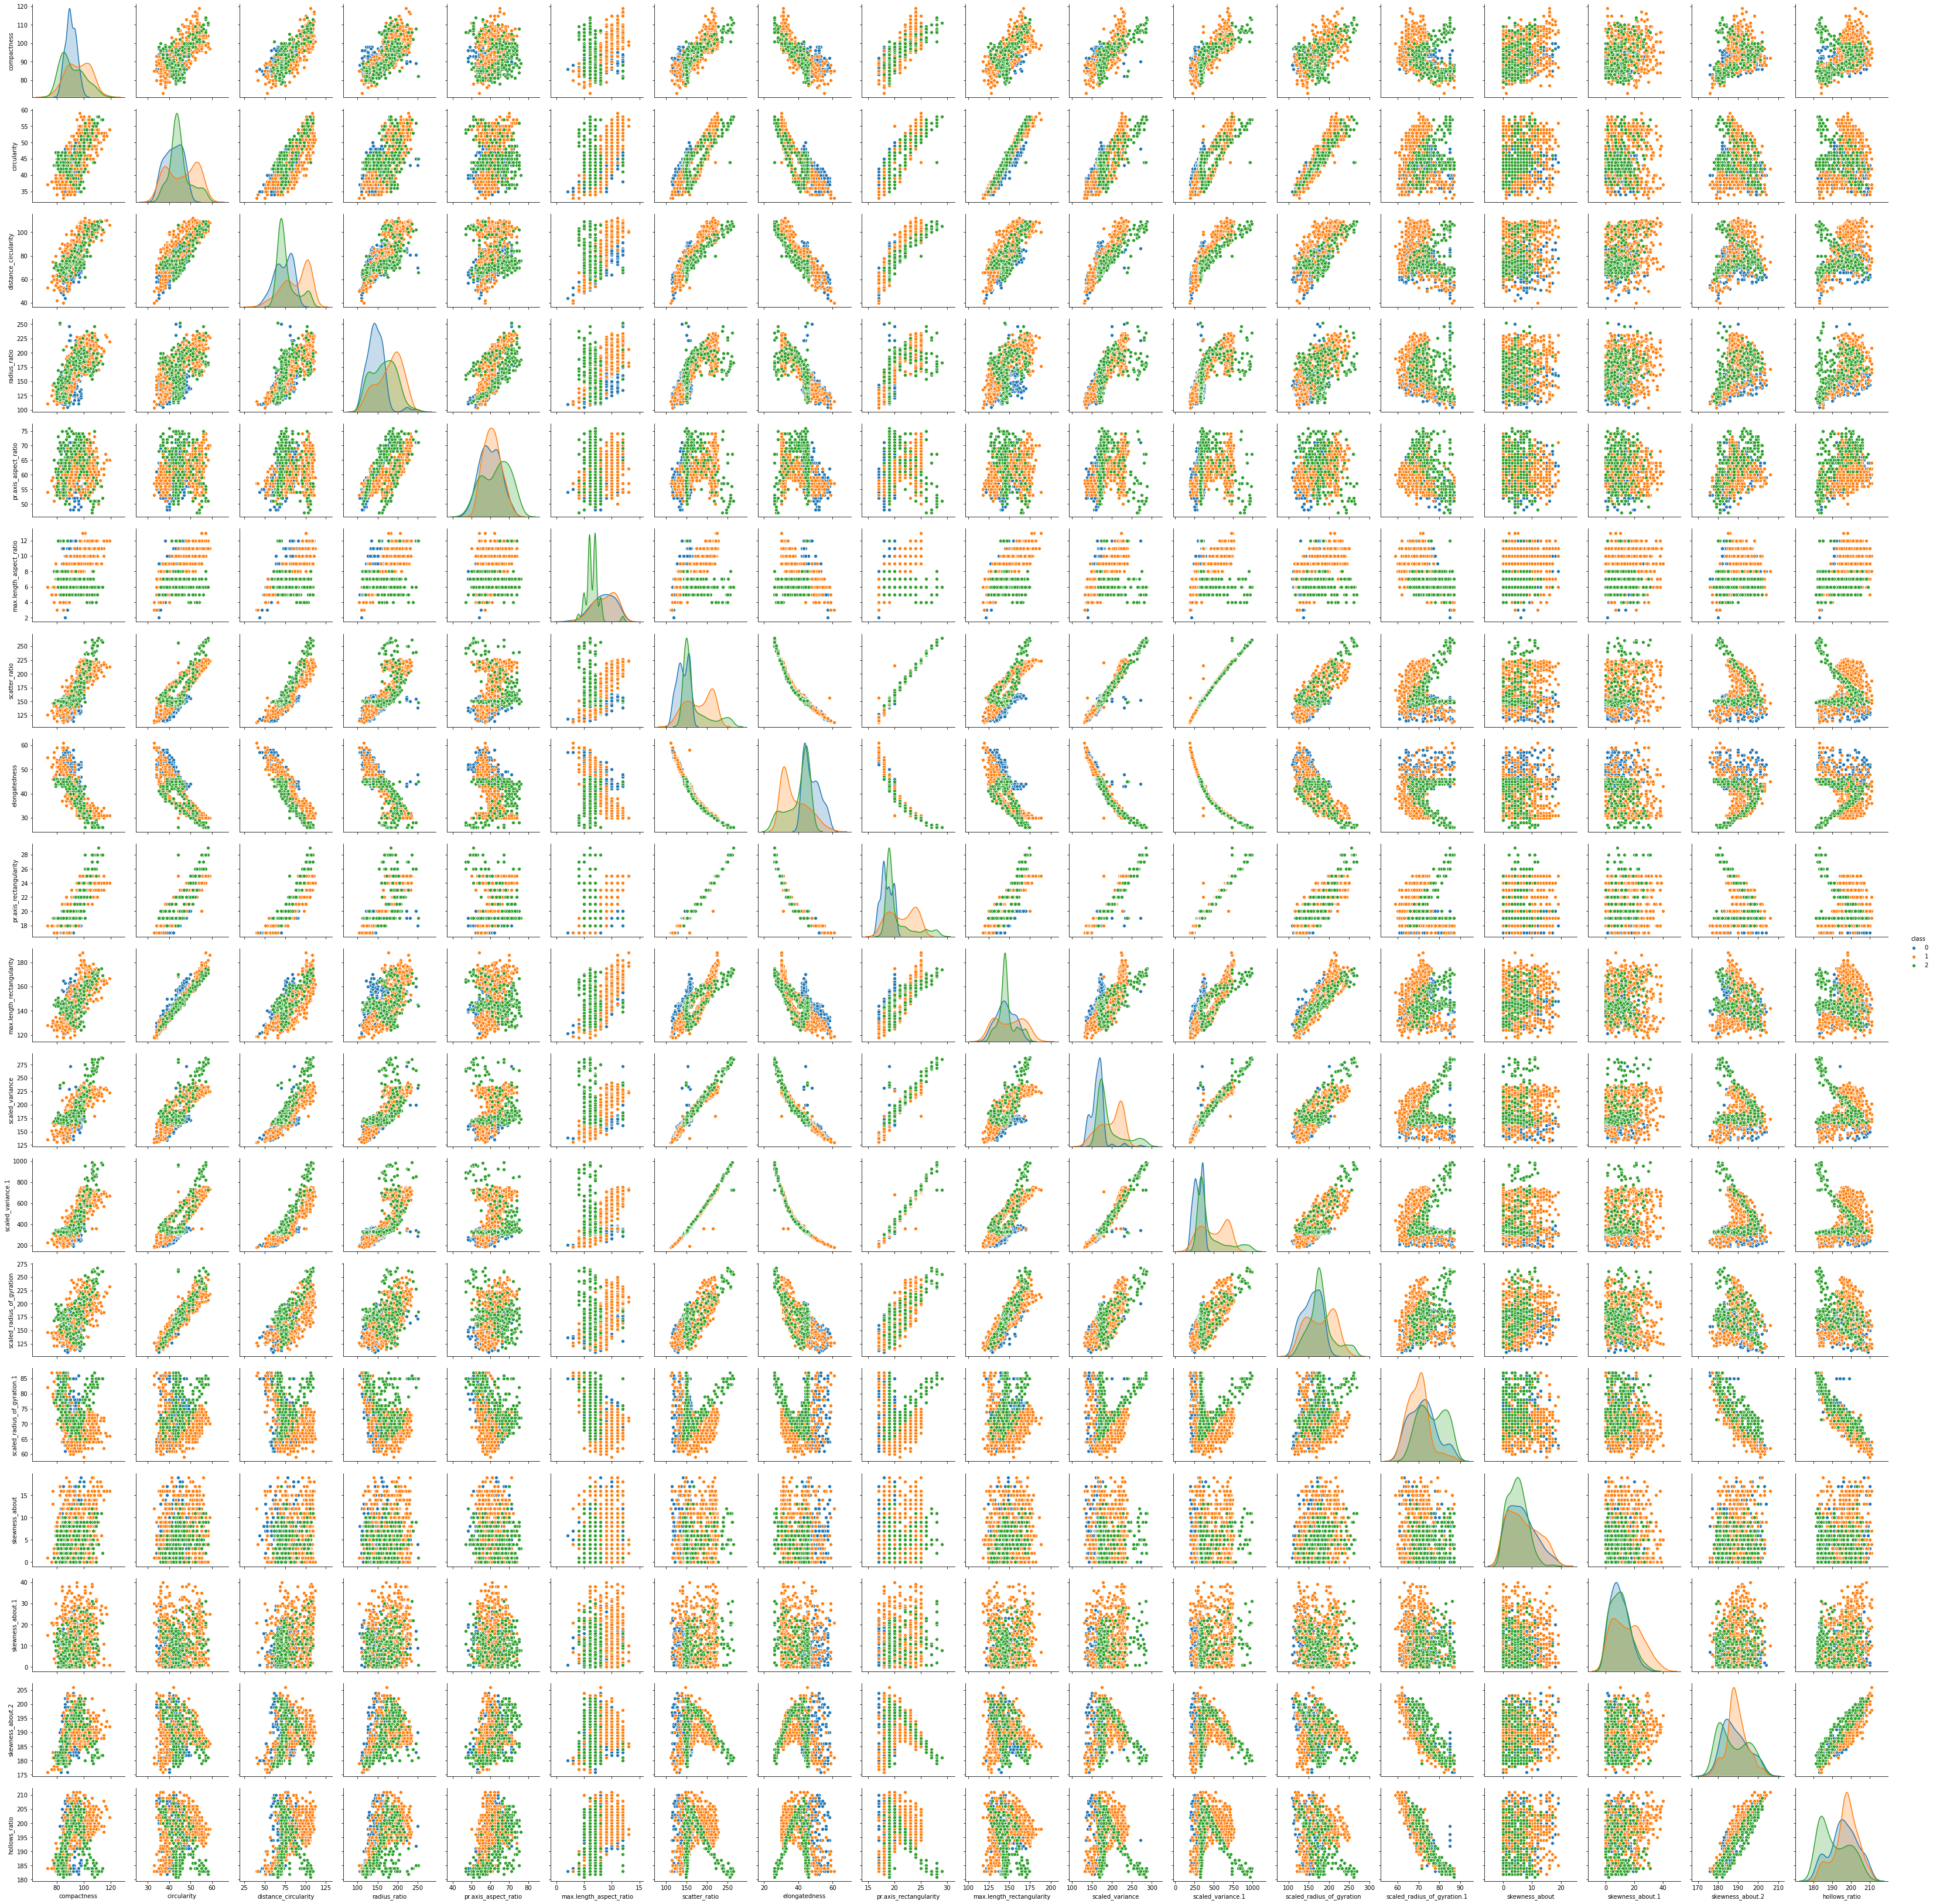

In [83]:
sns.pairplot(vehicle_data,hue='class',diag_kind='kde');

From the pair plot,it clearly shows that many features are having strong correlation among themselves.

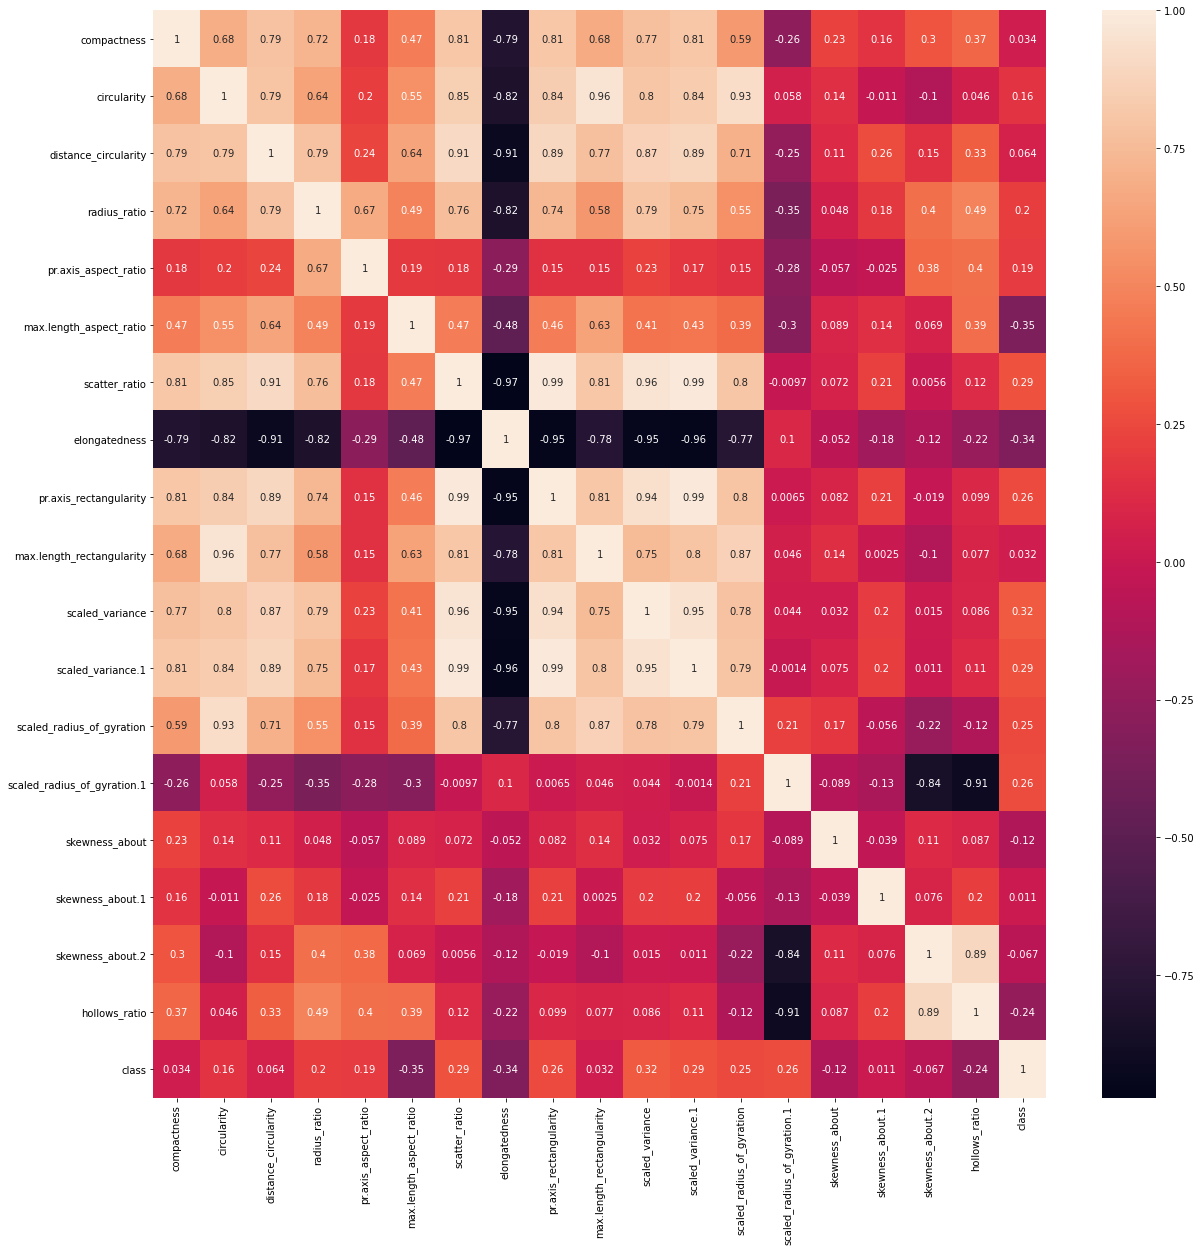

In [84]:
plt.figure(figsize=(20,20))
sns.heatmap(vehicle_data.corr(),annot=True);

From this,we can infer that target Variable(class) is having light correlation with scaled variance.Also some features are having high correlation among themselves(Multicollinearity).This will affect the linear Models like logistic regression

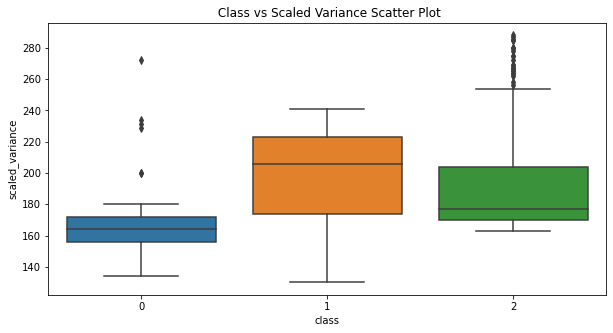

In [85]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='scaled_variance',data=vehicle_data);
plt.title(" Class vs Scaled Variance Scatter Plot");

From this we can infer that Bus & Van is having many outliers.On the other hand Car does not have single outlier.

But Car is having average higher scaled_variance.

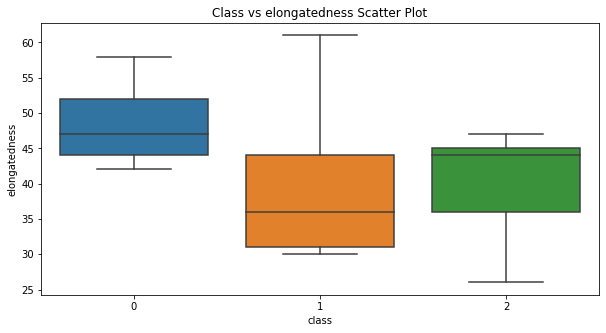

In [86]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='elongatedness',data=vehicle_data);
plt.title("Class vs elongatedness Scatter Plot");

From this we can infer that Van is having average higher elongatedness.Car is having least elongatedness

### Splitting Training & Test data

In [87]:
X=vehicle_data.drop(['class'],axis=1)
y=vehicle_data['class']
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=7)

Here we are Splitting Train & test dataset as 70:30 ratio

### EDA - Scaling Numerical Attributes

In [88]:
x_train_scaled = pd.DataFrame(MinMaxScaler().fit_transform(xtrain), columns = xtrain.columns)
x_test_scaled = pd.DataFrame(MinMaxScaler().fit_transform(xtest), columns = xtest.columns)
x_train_scaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.369565     0.384615              0.569444      0.857143   
1     0.195652     0.153846              0.263889      0.197279   
2     0.478261     0.500000              0.888889      0.700680   
3     0.413043     0.076923              0.250000      0.210884   
4     0.673913     0.653846              0.916667      0.707483   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              0.827586                      0.9       0.248366   
1              0.551724                      0.4       0.150327   
2              0.655172                      0.6       0.516340   
3              0.379310                      0.3       0.065359   
4              0.655172                      0.7       0.620915   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.542857                0.166667                   0.455882   
1       0.714286                0.083333                   0.147059   
2       0.257143                0.416667                   0.441176   
3       0.828571                0.000000                   0.205882   
4       0.171429                0.500000                   0.588235   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         0.443038           0.184309                   0.342105   
1         0.132911           0.099626                   0.203947   
2         0.506329           0.447073                   0.375000   
3         0.075949           0.047323                   0.026316   
4         0.588608           0.561644                   0.710526   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                     0.928571        0.263158          0.236842   
1                     0.821429        0.578947          0.631579   
2                     0.321429        0.000000          0.736842   
3                     0.178571        0.315789          0.447368   
4                     0.500000        0.736842          0.236842   

   skewness_about.2  hollows_ratio  
0          0.333333       0.500000  
1          0.100000       0.133333  
2          0.466667       0.633333  
3          0.700000       0.733333  
4          0.400000       0.500000

Here we are Scaling the Trained and Test data using MinMaxScaler to Standardize the data

### SVM Model

In [89]:
svm_model=SVC(kernel='rbf')
svm_model.fit(x_train_scaled,ytrain)

SVC()

In [90]:
print("The Training Accuracy Score is :",svm_model.score(x_train_scaled,ytrain))
print("The Test Accuracy Score is : ",svm_model.score(x_test_scaled,ytest))

The Training Accuracy Score is : 0.9797297297297297
The Test Accuracy Score is :  0.9645669291338582


##### HyperParameter Tuning to find Best C and Gamma

In [91]:
pipe_steps_without_pca=[('scaler', StandardScaler()),('SVM',SVC(kernel='rbf'))]
params_without_pca=params={'SVM__C':[0.1,0.5,1,5,10,30,40,50,75,100,500,1000],
       'SVM__gamma':[0.001,0.005,0.01,0.05,0.07,0.1,0.5,1,5,10,50]}
pipeline=Pipeline(pipe_steps_without_pca)
grid_without_pca=GridSearchCV(pipeline,param_grid=params_without_pca,cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=7))
grid_without_pca.fit(xtrain,ytrain)
print("Best params")
print(grid_without_pca.best_params_)



Best params
{'SVM__C': 30, 'SVM__gamma': 0.07}


With the help of gridsearch we find the optimized hyperparameter value for C is 30 and for gamma is 0.07.We use this value to build the Best fit SVM model

In [92]:
print("The Training Accuracy Score is :",grid_without_pca.score(xtrain,ytrain))
print("The Test Accuracy Score is : ",grid_without_pca.score(xtest,ytest))
svm_ypredict_without_pca=grid_without_pca.predict(xtest)

The Training Accuracy Score is : 1.0
The Test Accuracy Score is :  0.9724409448818898


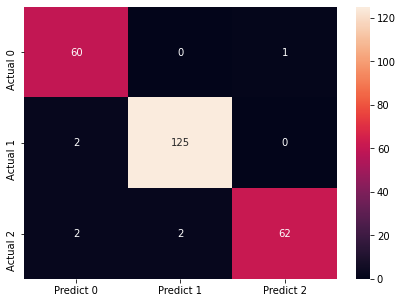

In [93]:
cm=confusion_matrix(ytest, svm_ypredict_without_pca, labels=[0,1,2])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 0","Actual 1","Actual 2"]],
                  columns = [i for i in ["Predict 0","Predict 1","Predict 2"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g');

In [94]:
print(classification_report(ytest,svm_ypredict_without_pca))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        61
           1       0.98      0.98      0.98       127
           2       0.98      0.94      0.96        66

    accuracy                           0.97       254
   macro avg       0.97      0.97      0.97       254
weighted avg       0.97      0.97      0.97       254



We are getting accuracy of 98 percent in Test data using all the data attributes.Now we will apply Dimensionality Reduction and find the
accuracy

### PCA

In [95]:
x_train_sd = StandardScaler().fit_transform(xtrain)
x_test_sd = StandardScaler().fit_transform(xtest)

In [96]:
pca = PCA()
pca.fit(x_train_sd)

PCA()

In [97]:
print(pca.explained_variance_ratio_)

[5.44493263e-01 1.83463893e-01 6.73692288e-02 6.38388028e-02
 4.63683494e-02 3.81769939e-02 1.83241269e-02 1.21508788e-02
 7.16610061e-03 4.99203397e-03 3.37854060e-03 3.22074936e-03
 2.18705150e-03 1.65380123e-03 1.19366437e-03 1.14075595e-03
 6.41320300e-04 2.40445304e-04]


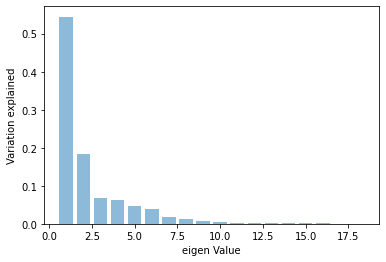

In [98]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

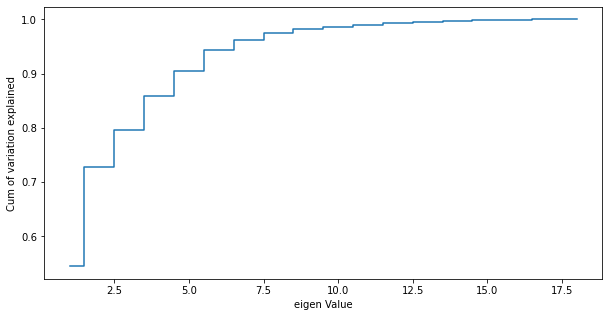

In [99]:
plt.figure(figsize=(10,5))
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

From this plot,we can infer that around 95 percentage of Variance was explained by 7 prinicipal components.We can use this 7 Components
to build the model

### SVM Model Using Dimensionally Reduced Attributes

In [100]:
pca7 = PCA(n_components=7)
pca7.fit(x_train_sd)
x_train_pca= pca7.transform(x_train_sd)
x_test_pca=pca7.transform(x_test_sd)

In [101]:
svm_model=SVC(kernel='rbf')
svm_model.fit(x_train_pca,ytrain)

SVC()

In [102]:
print("The Training Accuracy Score After PCA is :",svm_model.score(x_train_pca,ytrain))
print("The Test Accuracy Score After PCA is : ",svm_model.score(x_test_pca,ytest))

The Training Accuracy Score After PCA is : 0.9476351351351351
The Test Accuracy Score After PCA is :  0.9173228346456693


We are getting Accuracy of around 92 Percentage in Test Data.We can tune this Model using GridSearch to Improve the accuracy

In [103]:
pipe_steps_with_pca=[('scaler', StandardScaler()),('PCA',PCA()),('SVM',SVC(kernel='rbf'))]
pipeline=Pipeline(pipe_steps_with_pca)
params_with_pca={
        'PCA__n_components':[7],
       'SVM__C':[0.1,0.5,1,5,10,30,40,50,75,100,500,1000],
       'SVM__gamma':[0.001,0.005,0.01,0.05,0.07,0.1,0.5,1,5,10,50]}
pipeline=Pipeline(pipe_steps_with_pca)
grid_with_pca=GridSearchCV(pipeline,param_grid=params_with_pca,cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=7))
grid_with_pca.fit(xtrain,ytrain)
print("Best params")
print(grid_with_pca.best_params_)

Best params
{'PCA__n_components': 7, 'SVM__C': 5, 'SVM__gamma': 0.07}


In [104]:
print("The Training Accuracy Score is :",grid_with_pca.score(xtrain,ytrain))
print("The Test Accuracy Score is : ",grid_with_pca.score(xtest,ytest))
svm_ypredict_with_pca=grid_with_pca.predict(xtest)

The Training Accuracy Score is : 0.9679054054054054
The Test Accuracy Score is :  0.9291338582677166


By Using HyperParameter Tuning We have Increased the accuracy from 92 percent  to 94 Percent in test data

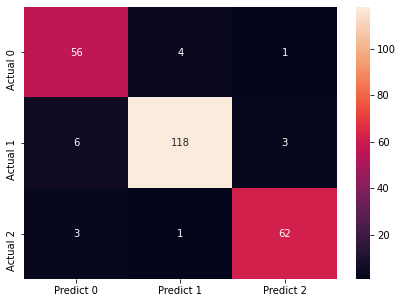

In [105]:
cm=confusion_matrix(ytest, svm_ypredict_with_pca, labels=[0,1,2])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 0","Actual 1","Actual 2"]],
                  columns = [i for i in ["Predict 0","Predict 1","Predict 2"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g');

In [106]:
print(classification_report(ytest,svm_ypredict_with_pca))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        61
           1       0.96      0.93      0.94       127
           2       0.94      0.94      0.94        66

    accuracy                           0.93       254
   macro avg       0.92      0.93      0.92       254
weighted avg       0.93      0.93      0.93       254



##### Conclusion

Without using PCA , we are getting Accuracy of 98 Percent

By Using PCA  with 7 Components we are getting Accuracy of 94 Percent.

Since we are using only 7 Components,the reduce in Accuracy is acceptable.But Instead of using 18 attributes,we are almost maintain the accuracy by using only 7 attributes.

So PCA helps in reduce the dimensionality which will results in reduction of Computational cost.

Also this Model is now more generalized and the features are independent now.Earlier we had features which are dependent on each other.



### Part - 4

In [107]:
players_data=pd.read_csv("Part4 - batting_bowling_ipl_bat.csv",skip_blank_lines=True)
players_data.head()

Name   Runs    Ave      SR  Fours  Sixes   HF
0        NaN    NaN    NaN     NaN    NaN    NaN  NaN
1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
2        NaN    NaN    NaN     NaN    NaN    NaN  NaN
3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
4        NaN    NaN    NaN     NaN    NaN    NaN  NaN

We are having empty rows in between each original rows.We can remove the empty rows 

In [108]:
players_data.dropna(how='all',inplace=True) # It will drop the rows only if all the values in row are null

In [109]:
players_data.shape

(90, 7)

The Given dataset contains 90 observations and 7 attributes

In [110]:
players_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


Here all the Features are Numberical,Except name which is player name

In [111]:
players_data.isnull().sum()

Name     0
Runs     0
Ave      0
SR       0
Fours    0
Sixes    0
HF       0
dtype: int64

Here we do not have any null values in any columns.

### Univariate Analysis

In [112]:
players_data.describe()

Runs        Ave          SR      Fours      Sixes         HF
count   90.000000  90.000000   90.000000  90.000000  90.000000  90.000000
mean   219.933333  24.729889  119.164111  19.788889   7.577778   1.188889
std    156.253669  13.619215   23.656547  16.399845   8.001373   1.688656
min      2.000000   0.500000   18.180000   0.000000   0.000000   0.000000
25%     98.000000  14.665000  108.745000   6.250000   3.000000   0.000000
50%    196.500000  24.440000  120.135000  16.000000   6.000000   0.500000
75%    330.750000  32.195000  131.997500  28.000000  10.000000   2.000000
max    733.000000  81.330000  164.100000  73.000000  59.000000   9.000000

In [113]:
players_data.skew(numeric_only=True)

Runs     0.754618
Ave      1.038076
SR      -1.166175
Fours    1.107192
Sixes    3.226595
HF       2.001199
dtype: float64

From this we can infer that Sixes and half centuries attribute are having higher skewness

In [114]:
players_data.kurtosis(numeric_only=True)

Runs      0.330792
Ave       2.712777
SR        3.745207
Fours     0.960768
Sixes    18.078460
HF        5.003911
dtype: float64

From this we can infer that Sixes and half centuries attributes are having higher kurtosis values which means more data points are around the tail.

In [115]:
def plots(feature):
    fig = plt.figure(constrained_layout = True, figsize=(10,3))
    gs = gridspec.GridSpec(nrows=1, ncols=4, figure=fig)

    ax1 = fig.add_subplot(gs[0,:3])    
    sns.distplot(players_data[feature]);
    ax2 = fig.add_subplot(gs[0,3])    
    sns.boxplot(players_data[feature]);

Skewness of  Runs is 0.7546182074017156
Kurtosis of  Runs is 0.33079229472282323
Median of  Runs is 196.5
--------------------------------------------------------
Skewness of  Ave is 1.0380761028118908
Kurtosis of  Ave is 2.712777067466585
Median of  Ave is 24.44
--------------------------------------------------------
Skewness of  SR is -1.1661754253831866
Kurtosis of  SR is 3.7452068191638626
Median of  SR is 120.13499999999999
--------------------------------------------------------
Skewness of  Fours is 1.1071923631374405
Kurtosis of  Fours is 0.9607683353967449
Median of  Fours is 16.0
--------------------------------------------------------
Skewness of  Sixes is 3.226594649080933
Kurtosis of  Sixes is 18.078459897928212
Median of  Sixes is 6.0
--------------------------------------------------------
Skewness of  HF is 2.0011991351731986
Kurtosis of  HF is 5.003911114317674
Median of  HF is 0.5
--------------------------------------------------------


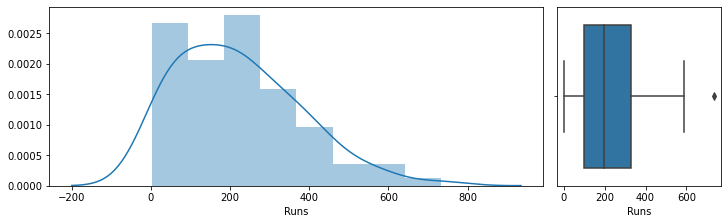

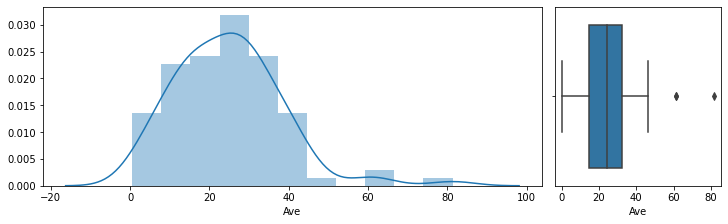

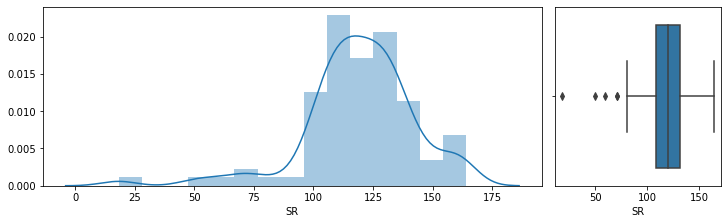

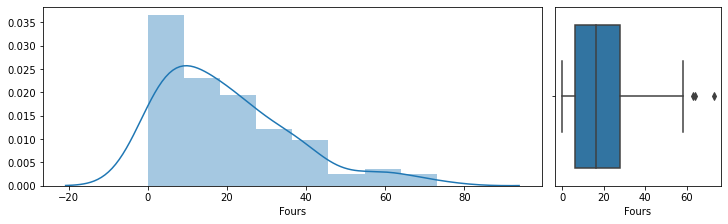

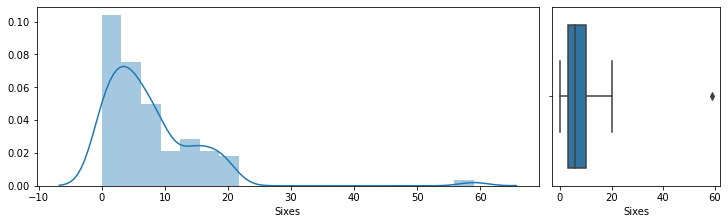

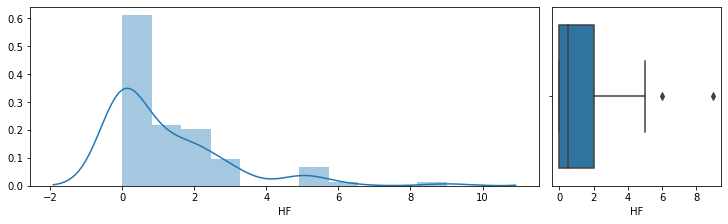

In [116]:
num_columns=['Runs','Ave','SR','Fours','Sixes','HF']
for col in num_columns:
    print("Skewness of ",col,"is",players_data[col].skew())
    print("Kurtosis of ",col,"is",players_data[col].kurtosis())
    print("Median of ",col,"is",players_data[col].median())
    print("--------------------------------------------------------")
    plots(col)

From the above plots, we can infer following points:

Runs attribute is having median value of around 200 and it is having one outlier.It is slightly right skewed.

Average attribute is having median value of around 25 and it is having few outlier with higher averages.It is right skewed.

Strike Rate attribute is having median value of around 120 and it is heavily left skewed.It is having few outliers at the left.

Fours attribute is having median value of 16 and it is slightly right skewed.It is having few outliers at tail.

Sixes attribute is having median value of 6 and it is heavily right skewed.It is having one outlier at tail.

Half Centuries attribute is having median of 0.5 and it is also right skewed and having few outliers.



#### Bivariate Analysis

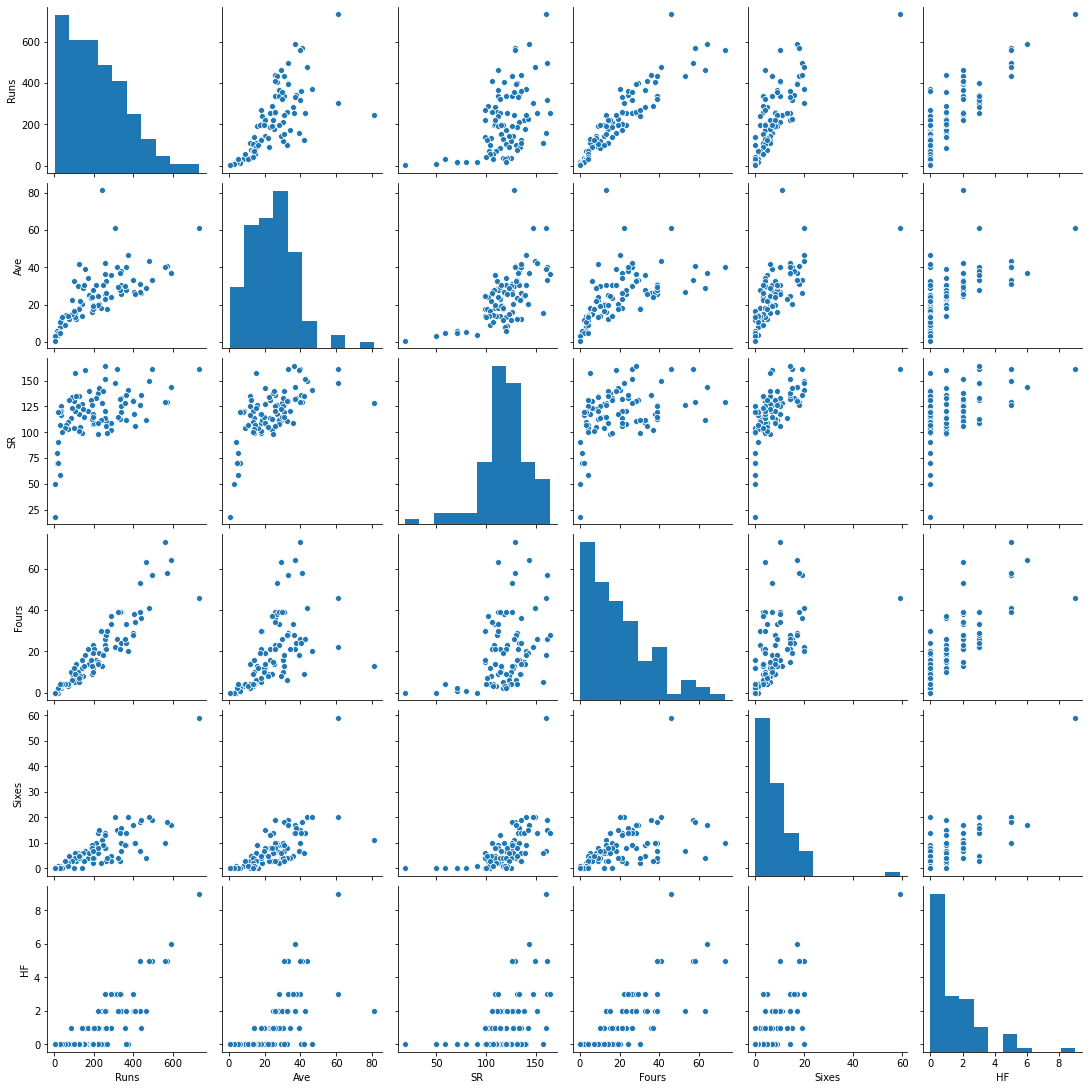

In [117]:
sns.pairplot(players_data);

From the Pairplot,we can infer that features are having high positive correlation among them.



#### PCA

In [118]:
X=players_data.drop('Name',axis=1)
y=players_data['Name']

In [119]:
x_scaled = StandardScaler().fit_transform(X)

In [120]:
players_pca = PCA()
players_pca.fit(x_scaled)

PCA()

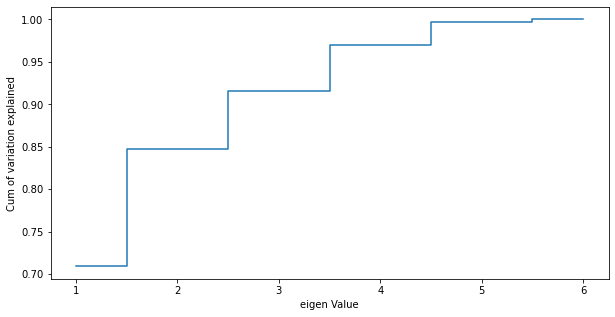

In [121]:
plt.figure(figsize=(10,5))
plt.step(list(range(1,7)),np.cumsum(players_pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

Since we are going to Rank the Players,around 70 percentage of variance is explained by principal component 1.So we take principal component as 1

In [122]:
pca7 = PCA(n_components=1) # Reducing the Componenent to one to get most variance explained by single variable
pca7.fit(x_scaled)
data2=pca7.fit_transform(x_scaled)
players_data['features_score']=data2 #Assigning the feature score to original column

In [123]:
players_data['Ranking']=players_data['features_score'].rank(ascending=False) # on the basis of feature score,we have ranked the players.

In [124]:
players_data

Name   Runs    Ave      SR  Fours  Sixes   HF  features_score  \
1           CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0        8.516774   
3          G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0        4.618340   
5           V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0        4.142251   
7           CL White  479.0  43.54  149.68   41.0   20.0  5.0        3.899411   
9           S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0        4.120072   
11         AM Rahane  560.0  40.00  129.33   73.0   10.0  5.0        4.024436   
13      KP Pietersen  305.0  61.00  147.34   22.0   20.0  3.0        2.879281   
15         RG Sharma  433.0  30.92  126.60   39.0   18.0  5.0        2.919015   
17    AB de Villiers  319.0  39.87  161.11   26.0   15.0  3.0        2.327389   
19         JP Duminy  244.0  81.33  128.42   13.0   11.0  2.0        2.081642   
21         DA Warner  256.0  36.57  164.10   28.0   14.0  3.0        2.083281   
23         SR Watson  255.0  42.50  151.78   26.0   14.0  2.0        1.776943   
25      F du Plessis  398.0  33.16  130.92   29.0   17.0  3.0        2.125167   
27           OA Shah  340.0  37.77  132.81   24.0   16.0  3.0        1.938872   
29          DJ Bravo  371.0  46.37  140.53   20.0   20.0  0.0        1.727636   
31         DJ Hussey  396.0  33.00  129.83   28.0   17.0  2.0        1.817132   
33          SK Raina  441.0  25.94  135.69   36.0   19.0  1.0        1.869895   
35         AT Rayudu  333.0  37.00  132.14   21.0   14.0  2.0        1.449317   
37     Mandeep Singh  432.0  27.00  126.31   53.0    7.0  2.0        1.795785   
39          R Dravid  462.0  28.87  112.13   63.0    4.0  2.0        1.834522   
41          DR Smith  157.0  39.25  160.20   18.0    7.0  1.0        0.685215   
43           M Vijay  336.0  25.84  125.84   39.0   10.0  2.0        1.281113   
45         SPD Smith  362.0  40.22  135.58   24.0   14.0  0.0        1.236725   
47        TM Dilshan  285.0  35.62  109.19   33.0    5.0  3.0        1.033747   
49        RV Uthappa  405.0  27.00  118.07   38.0   10.0  2.0        1.386346   
51          SE Marsh  336.0  30.54  120.00   39.0    7.0  2.0        1.181097   
53        KA Pollard  220.0  24.44  138.36   15.0   14.0  2.0        0.683734   
55   DMD Jayawardene  335.0  27.91  112.41   39.0    3.0  3.0        1.043562   
57           V Kohli  364.0  28.00  111.65   33.0    9.0  2.0        1.029168   
59        MA Agarwal  225.0  20.45  142.40   19.0   15.0  1.0        0.531600   
61      SR Tendulkar  324.0  29.45  114.48   39.0    4.0  2.0        0.879976   
63        MEK Hussey  261.0  32.62  110.59   28.0    8.0  2.0        0.669650   
65         JH Kallis  409.0  25.56  106.51   34.0   10.0  2.0        1.096419   
67          MS Dhoni  357.0  29.75  128.41   26.0    9.0  1.0        0.860131   
69          MS Bisla  213.0  30.42  133.12   16.0   10.0  1.0        0.323935   
71          JD Ryder  256.0  25.60  120.75   23.0    8.0  2.0        0.464752   
73          BJ Hodge  245.0  30.62  140.00   18.0    9.0  0.0        0.259177   
75           NV Ojha  255.0  23.18  113.83   21.0   13.0  1.0        0.249989   
77            DB Das  126.0  42.00  135.48    9.0    6.0  0.0       -0.201160   
79      AC Gilchrist  172.0  34.40  120.27   21.0    4.0  1.0       -0.048071   
81       BB McCullum  289.0  24.08  102.12   37.0    3.0  1.0        0.088309   
83         IK Pathan  176.0  25.14  139.68   14.0    6.0  0.0       -0.366643   
85     Azhar Mahmood  186.0  23.25  130.98   16.0    8.0  0.0       -0.358365   
87         MK Pandey  143.0  20.42  127.67   12.0    6.0  1.0       -0.561062   
89       S Badrinath  196.0  28.00  108.28   23.0    2.0  1.0       -0.386336   
91         DA Miller   98.0  32.66  130.66    6.0    4.0  0.0       -0.804401   
93         MK Tiwary  260.0  26.00  105.69   21.0    3.0  1.0       -0.289488   
95         JA Morkel  107.0  15.28  157.35    5.0    6.0  0.0       -0.839387   
97       LRPL Taylor  197.0  19.70  115.20   12

Using the Feature Values we have Ranked the Players.

### Part - 5

#### Possible Dimensional Reduction Techniques

The Dimensional Reduction Techniques that can be implemented using Python are :

Principal Component Analysis(PCA)

Kerner PCA

Incremental PCA

Locally Linear Embedding

Multidimensional Scaling(MDS)

Isomap

Linear Discriminant Analysis

t-Distributed Stochastic Neighbor Embedding (tSNE)

### PCA on Image data

We can do PCA on Image,Video and text data as well.Let see Simple Implementation using PCA on Image dataset

The lenght of the Image dataset is 3
The shape of the Sample image is  (427, 640, 3)


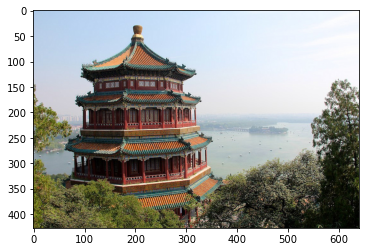

In [125]:
from sklearn.datasets import load_sample_images #Library for sample Images
img_datasets= load_sample_images() #Loading sample images 
print("The lenght of the Image dataset is",len(img_datasets))
sample_img=img_datasets.images[0] # Taking one sample Imgae for Illustration
print("The shape of the Sample image is ",sample_img.shape) # Printing the shape of the sample Image
plt.imshow(sample_img); #Displaying the sample image

From the above steps,we have loaded the image into numpy array of 3 dimensions.

(427, 640)


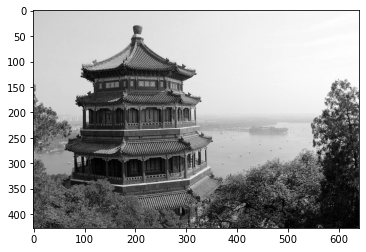

In [126]:
image_sum = sample_img.sum(axis=2) #Reducing the dimension from 3 to 2 for simplicity
sample_img_greyscale = image_sum/image_sum.max()
print(sample_img_greyscale.shape)
plt.imshow(sample_img_greyscale,cmap=plt.cm.gray); #Displaying the converted greyscale Image

We have converted the image to greyscale from RGB for simplicity

Number of components explaining 95% variance: 47


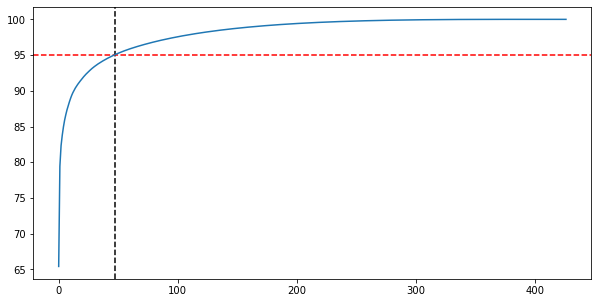

In [127]:
image_pca = PCA() # Initiating PCA object
image_pca.fit(sample_img_greyscale) # Fitting the Image data into PCA
var_cumu = np.cumsum(image_pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
plt.figure(figsize=(10,5))
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

From this ,we can take only 47 Principal Components as 95 percentage of Variance was explained by those

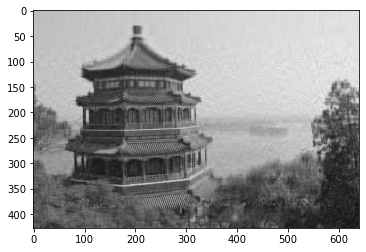

In [128]:
ipca = PCA(n_components=47)
image_recon = ipca.inverse_transform(ipca.fit_transform(sample_img_greyscale)) # Converting the image after compression
plt.imshow(image_recon,cmap = plt.cm.gray); # Plotting the reconstructed image

From this,we have compressed the image from 427 components to 47 components.The Compressed Image explained most of the details.

By this technique,we can use PCA to compress Images 